In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from itertools import product
import scipy.stats as ss
from dython.nominal import associations

In [2]:
df = pd.read_excel("Book3.xlsx") # importing first page as for the first question

In [3]:
df.head()

,CodMun,State,State code,Municipaly,Estimated pop 2021,track_pop,Region,mpeg03,Mayor Age,Mayor Ethnicity,mpeg06 - Education of the mayor,Education of mayor,Projects aimed at Rural Population
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Masculine,40.0,White,Specialization,NaN,Yes
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,Female,33.0,White,complete higher education,2.0,Yes
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Masculine,50.0,brown,complete higher education,2.0,Yes
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,Masculine,35.0,brown,complete higher education,2.0,Yes
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Female,57.0,White,complete higher education,2.0,-


In [4]:
df.columns

Index(['CodMun', 'State', 'State code', 'Municipaly', 'Estimated pop 2021',
       'track_pop', 'Region', 'mpeg03', 'Mayor Age', 'Mayor Ethnicity',
       'mpeg06 - Education of the mayor', 'Education of mayor',
       'Projects  aimed at Rural Population'],
      dtype='object')

we are replacing the values with numbers changing the categorical values to numerical data 

In [5]:
replace_dict = {"Not":0, "Yes, as an integral part of the Master Plan" : 1, "Yes, with specific legislation" : 2,
                "Did not inform":3,"Refusal" : None, "1 - Up to 5000" : 1, "2 - 5001 to 10000" :2,
                "3 - 10001 to 20000" :3, "4 - 20001 to 50000" : 4,"5 - 50001 to 100000" : 5 ,
                "6 - 100001 to 500000" : 6,"7 - Greater than 500000" : 7 ,"1 - North" : 1,
                "2 - Northeast" :2,"3 - Southeast" : 3,"4 - South" : 4,"5 - Midwest" : 5}

In [6]:
df = df.replace(replace_dict)

In [7]:
replace_df = {"Elementary education (1st grade) incomplete" : 1,"Complete Elementary School (1st Degree)": 2,
              "Incomplete high school (2nd degree)" : 3,"High school (2nd degree) complete" : 4,
              "incomplete higher education" : 5,"complete higher education" : 6,"Master's degree" : 7,
              "Doctorate degree" : 8,"Specialization" : 9, "Masculine" : 1,"Female" : 0,
              "White" : 1,"brown" : 2,"black" : 3,"Yellow" : 4, "Indigenous" : 5,"Refusal" : None,
              "Yes" : 1,"No" : 0}

In [8]:
df = df.replace(replace_df)

In [9]:
df = df.drop("Education of mayor",axis=1)

In [10]:
df.columns

Index(['CodMun', 'State', 'State code', 'Municipaly', 'Estimated pop 2021',
       'track_pop', 'Region', 'mpeg03', 'Mayor Age', 'Mayor Ethnicity',
       'mpeg06 - Education of the mayor',
       'Projects  aimed at Rural Population'],
      dtype='object')

In [11]:
df.columns = ['CodMun', 'State', 'State_code', 'Municipality', 'Estimated pop 2021',
       'track_pop', 'Region','Gender', 'Mayor_Age', 'Mayor_Ethnicity','Ed_of_Mayor', 
       'Projects_aimed_at_RuralEducation']

In [12]:
df.head(10)

,CodMun,State,State_code,Municipality,Estimated pop 2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1.0,40.0,1.0,9.0,1
1,1100023,RO,11,Ariquemes,111148,6,1,0.0,33.0,1.0,6.0,1
2,1100031,RO,11,Cabixi,5067,2,1,1.0,50.0,2.0,6.0,1
3,1100049,RO,11,Cacoal,86416,5,1,1.0,35.0,2.0,6.0,1
4,1100056,RO,11,Cerejeiras,16088,3,1,0.0,57.0,1.0,6.0,-
5,1100064,RO,11,Colorado do Oeste,15213,3,1,1.0,56.0,2.0,6.0,1
6,1100072,RO,11,Corumbiara,7052,2,1,1.0,36.0,1.0,6.0,-
7,1100080,RO,11,Costa Marques,19255,3,1,1.0,41.0,2.0,4.0,1
8,1100098,RO,11,Espigão DOeste,33009,4,1,1.0,55.0,2.0,9.0,0
9,1100106,RO,11,Guajará-Mirim,46930,4,1,0.0,28.0,1.0,6.0,-


In [13]:
new_df = df[['Gender', 'Mayor_Age', 'Mayor_Ethnicity','Ed_of_Mayor', 
       'Projects_aimed_at_RuralEducation']]
# we are taking the data without common data to change into binary

In [14]:
new_df.head()

,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1.0,40.0,1.0,9.0,1
1,0.0,33.0,1.0,6.0,1
2,1.0,50.0,2.0,6.0,1
3,1.0,35.0,2.0,6.0,1
4,0.0,57.0,1.0,6.0,-


In [21]:
new_df["Projects_aimed_at_RuralEducation"] = new_df["Projects_aimed_at_RuralEducation"].replace({"-" : 99} )
# we have replaces '-' with 99 as we know the information we dont have 

/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_34201/3413493935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Projects_aimed_at_RuralEducation"] = new_df["Projects_aimed_at_RuralEducation"].replace({"-" : 99} )


In [22]:
new_df.head()

,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1.0,40.0,1.0,9.0,1.0
1,0.0,33.0,1.0,6.0,1.0
2,1.0,50.0,2.0,6.0,1.0
3,1.0,35.0,2.0,6.0,1.0
4,0.0,57.0,1.0,6.0,99.0


In [30]:
len(new_df)

5570

In [38]:
new_df[new_df.isnull().any(axis=1)]
# we are getting which rows have null values

,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
201,1.0,NaN,2.0,6.0,1.0
247,NaN,NaN,NaN,NaN,NaN
423,1.0,NaN,1.0,4.0,1.0
1914,1.0,NaN,2.0,6.0,1.0
1951,1.0,NaN,1.0,6.0,1.0
1984,0.0,NaN,1.0,4.0,0.0
2000,1.0,NaN,2.0,9.0,1.0
2183,1.0,NaN,3.0,4.0,1.0
2191,1.0,NaN,2.0,4.0,0.0
2667,1.0,NaN,1.0,6.0,99.0


In [49]:
new_df.iloc[423];

In [50]:
df.iloc[4559];

In [51]:
new_df_1 = new_df.dropna()
# dropping none values 

In [52]:
len(new_df_1)

5557

In [53]:
new_df_2 = new_df_1.astype(int)

In [54]:
new_df_2.dtypes

Gender                              int64
Mayor_Age                           int64
Mayor_Ethnicity                     int64
Ed_of_Mayor                         int64
Projects_aimed_at_RuralEducation    int64
dtype: object

In [55]:
new_df_2.head()

,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1,40,1,9,1
1,0,33,1,6,1
2,1,50,2,6,1
3,1,35,2,6,1
4,0,57,1,6,99


In [56]:
new_df_bin = new_df_2.applymap(lambda x: bin(x)[2:])

In [57]:
new_df_bin = new_df_2.applymap(lambda x: bin(x)[2:].zfill(7))

In [58]:
new_df_bin.head()

,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,0000001,0101000,0000001,0001001,0000001
1,0000000,0100001,0000001,0000110,0000001
2,0000001,0110010,0000010,0000110,0000001
3,0000001,0100011,0000010,0000110,0000001
4,0000000,0111001,0000001,0000110,1100011


In [59]:
2594/5570 # these are mayors did projects at rural education

0.46570915619389586

In [60]:
634/5570 # these are mayors didnt do any projects towards rural population

0.11382405745062836

In [61]:
2338/5570 # these are the mayors we dont have information if they did projects or not 

0.4197486535008977

In [62]:
new_df_bin['combined'] = pd.concat([new_df_bin['Gender'],
                                     new_df_bin['Mayor_Age'],
                                     new_df_bin["Mayor_Ethnicity"],
                                     new_df_bin["Ed_of_Mayor"],
                                     new_df_bin["Projects_aimed_at_RuralEducation"]]
                                    ,axis=1).apply("".join, axis =1)

In [63]:
new_df_bin.head()

,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation,combined
0,0000001,0101000,0000001,0001001,0000001,00000010101000000000100010010000001
1,0000000,0100001,0000001,0000110,0000001,00000000100001000000100001100000001
2,0000001,0110010,0000010,0000110,0000001,00000010110010000001000001100000001
3,0000001,0100011,0000010,0000110,0000001,00000010100011000001000001100000001
4,0000000,0111001,0000001,0000110,1100011,00000000111001000000100001101100011


In [64]:
new_df_cint = new_df_bin.applymap(lambda x: int(x, 2))

In [65]:
new_df_cint.head()

,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation,combined
0,1,40,1,9,1,352339073
1,0,33,1,6,1,69223169
2,1,50,2,6,1,373326593
3,1,35,2,6,1,341869313
4,0,57,1,6,99,119554915


In [ ]:
#CODE FOR SURVAY DATA MUNCIPALITIES SELECTION`

In [69]:
survay_data = pd.read_excel("SPSS.xlsx")

In [70]:
survay_data.head()

,Date,Timestamp,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,...,(44.4) Was Paper media (such as Newspapers) the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.5) Was Social media the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.6) Was Social networks the most relevant mode of information about sanitation/health through? (No=0;Yes=1),(44.7) Was School the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.8) Was Church the most relevant mode of information about sanitation/health through? (No=0;Yes=1),(44.9) Is 'No response' given? No=0;Yes=1,(44.10) Is there another source? No=0;Yes=1,"(45) If Other (or add some info/details), specify","(45.1) If Other (or add some info/details), specify","(45.2) If Other (or add some info/details), specify - Code"
0,2022-11-05 20:14:17.314,20:14:17,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"The informant is From the Health Council, User...",Works within healthcare,1.0
1,2022-11-05 20:16:07.379,20:16:07,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,He was a member of the Regional Social Assista...,Works within healthcare,1.0
2,2022-11-05 20:42:46.933,20:42:47,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,youtube,YouTube,2.0
3,2022-11-05 21:30:45.789,21:30:46,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Not applicable,Not applicable,0.0
4,2022-11-05 22:06:08.905,22:06:09,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not applicable,Not applicable,0.0


In [71]:
survay_data["City"].value_counts()

Belo Horizonte        44
Ribeirão das Neves    13
Nova Lima             13
Nova União            13
Baldim                13
Contagem               8
Name: City, dtype: int64

In [492]:
charan = pd.read_excel("Book3.xlsx","Q Legislation & planning instr")

In [493]:
charan["Mleg16"].value_counts()

Not                                            3373
Yes, as an integral part of the Master Plan    1316
Yes, with specific legislation                  873
Did not inform                                    6
Refusal                                           2
Name: Mleg16, dtype: int64

In [73]:
df1 = pd.read_excel("Book3.xlsx","Q Legislation & planning instr")

In [74]:
df1.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Mleg16,Mleg161,Mleg20,Mleg201,Mleg21
0,1100015,RO,11,Alta Floresta DOeste,22516,4 - 20001 to 50000,1 - North,Not,-,Not,-,Not
1,1100023,RO,11,Ariquemes,111148,6 - 100001 to 500000,1 - North,"Yes, with specific legislation",2008,"Yes, with specific legislation",2008,"Yes, with specific legislation"
2,1100031,RO,11,Cabixi,5067,2 - 5001 to 10000,1 - North,Not,-,Not,-,Not
3,1100049,RO,11,Cacoal,86416,5 - 50001 to 100000,1 - North,"Yes, as an integral part of the Master Plan",-,Not,-,"Yes, as an integral part of the Master Plan"
4,1100056,RO,11,Cerejeiras,16088,3 - 10001 to 20000,1 - North,Not,-,"Yes, with specific legislation",1987,"Yes, as an integral part of the Master Plan"


In [75]:
replace_dict = {"Not":0, "Yes, as an integral part of the Master Plan" : 1, "Yes, with specific legislation" : 2,
                "Did not inform":3,"Refusal" : None, "1 - Up to 5000" : 1, "2 - 5001 to 10000" :2,
                "3 - 10001 to 20000" :3, "4 - 20001 to 50000" : 4,"5 - 50001 to 100000" : 5 ,
                "6 - 100001 to 500000" : 6,"7 - Greater than 500000" : 7 ,"1 - North" : 1,
                "2 - Northeast" :2,"3 - Southeast" : 3,"4 - South" : 4,"5 - Midwest" : 5}

In [76]:
df1 = df1.replace(replace_dict)

In [77]:
df1["Mleg21"].value_counts()

0.0    3109
1.0    1274
2.0    1178
3.0       7
Name: Mleg21, dtype: int64

In [78]:
df1.head(10)

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Mleg16,Mleg161,Mleg20,Mleg201,Mleg21
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0.0,-,0.0,-,0.0
1,1100023,RO,11,Ariquemes,111148,6,1,2.0,2008,2.0,2008,2.0
2,1100031,RO,11,Cabixi,5067,2,1,0.0,-,0.0,-,0.0
3,1100049,RO,11,Cacoal,86416,5,1,1.0,-,0.0,-,1.0
4,1100056,RO,11,Cerejeiras,16088,3,1,0.0,-,2.0,1987,1.0
5,1100064,RO,11,Colorado do Oeste,15213,3,1,0.0,-,2.0,1987,0.0
6,1100072,RO,11,Corumbiara,7052,2,1,0.0,-,0.0,-,0.0
7,1100080,RO,11,Costa Marques,19255,3,1,0.0,-,0.0,-,0.0
8,1100098,RO,11,Espigão DOeste,33009,4,1,1.0,-,0.0,-,0.0
9,1100106,RO,11,Guajará-Mirim,46930,4,1,2.0,1973,0.0,-,2.0


In [79]:
df1.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'Mleg16', 'Mleg161', 'Mleg20', 'Mleg201', 'Mleg21'],
      dtype='object')

In [80]:
df1 = df1.drop(['Mleg161','Mleg201'],axis=1)

In [81]:
df1.columns = ['CodMun', 'State', 'State code', 'Municipality', 'Pop', 
               'track_pop','Region', 'Concession_special_use_for_housing', 
               'Legitamate_Posession', 'Environmental_impact']

In [82]:
df1["Concession_special_use_for_housing"].value_counts()

0.0    3373
1.0    1316
2.0     873
3.0       6
Name: Concession_special_use_for_housing, dtype: int64

In [83]:
df1.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0.0,0.0,0.0
1,1100023,RO,11,Ariquemes,111148,6,1,2.0,2.0,2.0
2,1100031,RO,11,Cabixi,5067,2,1,0.0,0.0,0.0
3,1100049,RO,11,Cacoal,86416,5,1,1.0,0.0,1.0
4,1100056,RO,11,Cerejeiras,16088,3,1,0.0,2.0,1.0


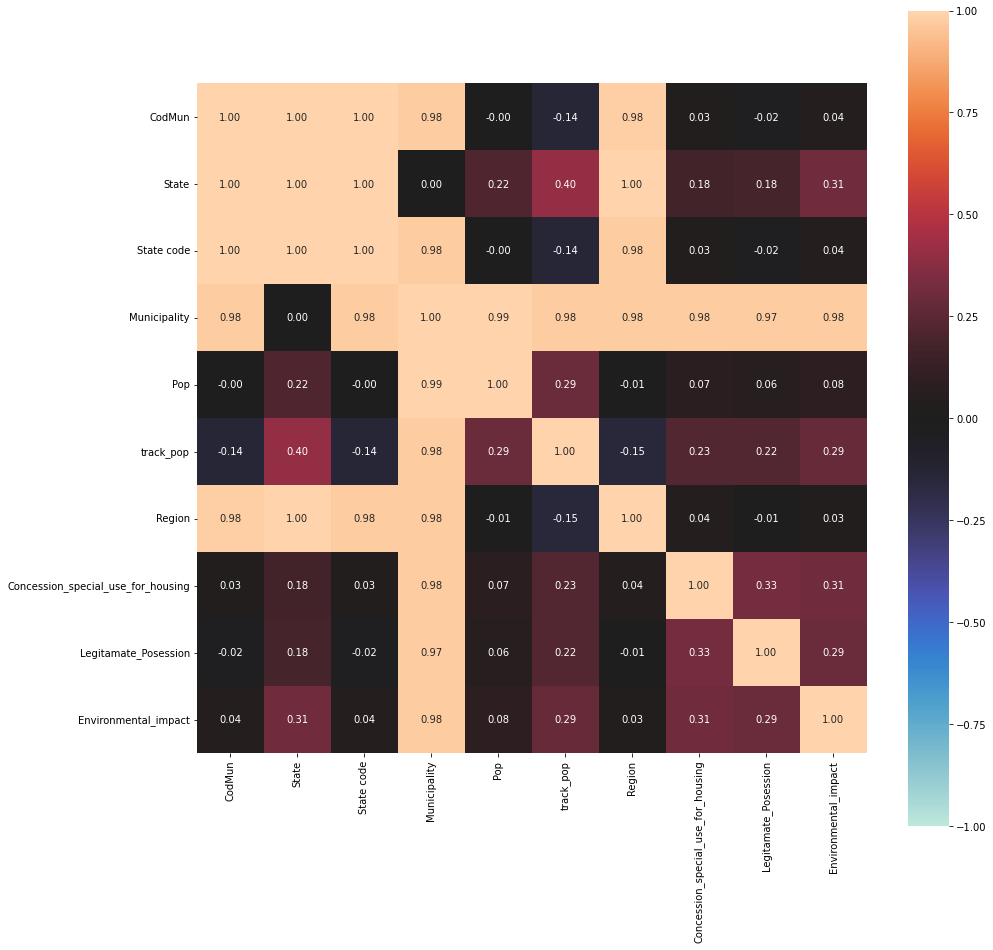

In [84]:
associations(df1,figsize = (15,15));

In [85]:
df1.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'Concession_special_use_for_housing', 'Legitamate_Posession',
       'Environmental_impact'],
      dtype='object')

In [86]:
new_df1 = df1[['Pop','Concession_special_use_for_housing', 'Legitamate_Posession',
       'Environmental_impact']]

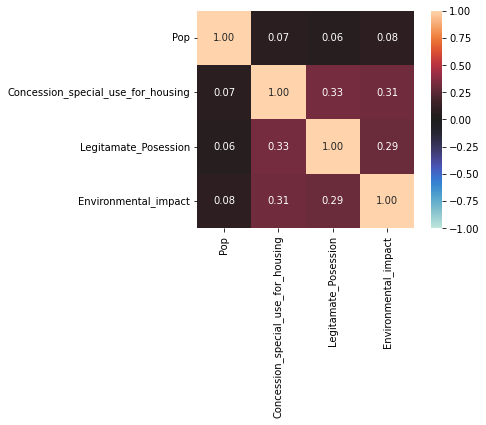

In [87]:
corr = associations(new_df1)

In [101]:

df2 = pd.read_excel("Book3.xlsx","Q3 Education")
df3 = pd.read_excel("Book3.xlsx","Culture")
df4 = pd.read_excel("Book3.xlsx","Health")

In [102]:
replace_dict = {"Not":0, "Yes, as an integral part of the Master Plan" : 1, "Yes, with specific legislation" : 2,
                "Did not inform":3,"Refusal" : None, "1 - Up to 5000" : 1, "2 - 5001 to 10000" :2,
                "3 - 10001 to 20000" :3, "4 - 20001 to 50000" : 4,"5 - 50001 to 100000" : 5 ,
                "6 - 100001 to 500000" : 6,"7 - Greater than 500000" : 7 ,"1 - North" : 1,
                "2 - Northeast" :2,"3 - Southeast" : 3,"4 - South" : 4,"5 - Midwest" : 5, "Yes" : 1}

In [103]:
df = df.replace(replace_dict)
df2 = df2.replace(replace_dict)
df3 = df3.replace(replace_dict)
df4 = df4.replace(replace_dict)

In [104]:
df4["Msau28"].value_counts()

1.0    4938
0.0     629
3.0       1
Name: Msau28, dtype: int64

In [320]:
df2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0,0,0,0
1,1100023,RO,11,Ariquemes,111148,6,1,0,0,1,0
2,1100031,RO,11,Cabixi,5067,2,1,0,0,0,1
3,1100049,RO,11,Cacoal,86416,5,1,0,0,1,0
4,1100056,RO,11,Cerejeiras,16088,3,1,0,0,0,0


In [321]:
df2["Medu1115"].value_counts()
#either we can remove the '-'values or fill with commmon value  

KeyError: 'Medu1115'

In [322]:
r2 = ['CodMun', 'State', 'State code', 'Municipality', 'Pop', 
               'track_pop','Region',"ISDRS" , "SCI" , "DSDP", "PCR"]
# ISDRS = Inclusion of students with disabilities in regular schools,
# SCI = School-community integration (opening of schools to the community, use of collective
#      spaces for routine school actions, among other actions)
# DSDP = Decrease in school dropout and dropout (active search for students)
# PCR = Public call for registration

In [323]:
df2.columns = r2

In [324]:
df3.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Type of public office,mcul371,mcul372,mcul373,mcul374,mcul375,mcul376,mcul377,mcul378,mcul3901,Mcul39011
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Secretariat in conjunction with other sectoral...,0,0,0,1,1,0,1,1,1,1
1,1100023,RO,11,Ariquemes,111148,6,1,Sector subordinated directly to the head of th...,0,1,1,1,1,0,0,1,1,1
2,1100031,RO,11,Cabixi,5067,2,1,Secretariat in conjunction with other sectoral...,0,0,1,1,1,0,0,1,1,1
3,1100049,RO,11,Cacoal,86416,5,1,Indirect management body,1,1,0,1,1,0,0,1,1,2
4,1100056,RO,11,Cerejeiras,16088,3,1,Secretariat in conjunction with other sectoral...,0,0,0,1,1,0,0,1,1,1


In [325]:
r3 = ['CodMun', 'State', 'State code', 'Municipality', 'Pop', 
               'track_pop','Region','Type_of_Publicoffice' ,"News_Paper", 'Magazine', 
      'AM_Radio', 'FM_Radio', 'Community_Radio', 'Community_TV',
      'TV_Genrator', 'Internet_Provider','Public_Libraries',
      'res_Municipal_Mgt']

In [326]:
# Type_of_Publicoffice , News_Paper, Magazine, AM_Radio, FM_Radio, Community_Radio, Community_TV, TV_Genrator, Internet_Provider,Public_Libraries, res_Municipal_Mgt
df3.columns = r3

In [327]:
df3.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Secretariat in conjunction with other sectoral...,0,0,0,1,1,0,1,1,1,1
1,1100023,RO,11,Ariquemes,111148,6,1,Sector subordinated directly to the head of th...,0,1,1,1,1,0,0,1,1,1
2,1100031,RO,11,Cabixi,5067,2,1,Secretariat in conjunction with other sectoral...,0,0,1,1,1,0,0,1,1,1
3,1100049,RO,11,Cacoal,86416,5,1,Indirect management body,1,1,0,1,1,0,0,1,1,2
4,1100056,RO,11,Cerejeiras,16088,3,1,Secretariat in conjunction with other sectoral...,0,0,0,1,1,0,0,1,1,1


In [328]:
df3["Type_of_Publicoffice"].value_counts()

Secretariat in conjunction with other sectoral policies      4012
exclusive secretary                                           720
Sector subordinated to another secretariat                    338
Sector subordinated directly to the head of the Executive     273
Indirect management body                                      114
has no structure                                              109
3                                                               2
Name: Type_of_Publicoffice, dtype: int64

In [329]:
df3["Type_of_Publicoffice"][1]

'Sector subordinated directly to the head of the Executive'

In [330]:
df3;

In [331]:
replace_dict;

In [332]:
df4.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Msau141,msau142,Msau143,...,Msau21,Msau28,Msau281,Msau411,Msau451,Msau452,Msau453,Msau454,Msau455,Msau456
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1,0,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
1,1100023,RO,11,Ariquemes,111148,6,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
2,1100031,RO,11,Cabixi,5067,2,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
3,1100049,RO,11,Cacoal,86416,5,1,0,1,0,...,0,1.0,-,0,1.0,1.0,0.0,0.0,0.0,-
4,1100056,RO,11,Cerejeiras,16088,3,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-


In [333]:
df4.columns

Index(['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'Msau141', 'msau142', 'Msau143', 'msau15', 'msau1511', 'msau1512',
       'msau1513', 'msau1514', 'msau1515', 'msau1516', 'msau1517', 'msau1518',
       'Msau1519', 'Msau18', 'Msau181', 'Msau19', 'Msau191', 'Msau20',
       'Msau201', 'Msau21', 'Msau28', 'Msau281', 'Msau411', 'Msau451',
       'Msau452', 'Msau453', 'Msau454', 'Msau455', 'Msau456'],
      dtype='object')

In [334]:
df4['msau1511'].value_counts()

1    2571
0    1585
-    1410
3       2
Name: msau1511, dtype: int64

In [335]:
r4 = ['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
    "traning_periodically",'training_occasionally',"does_not_perform",
    "provides_infrastructure","PI_own_room","PI_Computer","PI_printer",
    "PI_Internet_Access",'PI_Own_Vehicle','PI_Telephone','PI_Daily','Own_budget_allocation',
    "PI_Transportation","Muncipal_Health_Conference",'Year_conference',
    'Regional_Management_collegiate',"meetings","Muncipal_Health_Plan",
    'Year_last_Plan','Health_Black','Health_Agent_Program','Number_commnuity_health_agents',
    'Programmes_Blacks','ES_muncipal_public_service','ES_another_Public_service',
    'ES_affiliated_private_service-SUS','T/R_publicservice_another_muncipality',
    'T/R_agreed_private-SUS',"NoES"]

msau181,msau201,,,,, msau191

In [336]:
df4.columns = r4

In [337]:
df4.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1,0,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
1,1100023,RO,11,Ariquemes,111148,6,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
2,1100031,RO,11,Cabixi,5067,2,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
3,1100049,RO,11,Cacoal,86416,5,1,0,1,0,...,0,1.0,-,0,1.0,1.0,0.0,0.0,0.0,-
4,1100056,RO,11,Cerejeiras,16088,3,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-


In [338]:
# ISDRS = Inclusion of students with disabilities in regular schools,
# SCI = School-community integration (opening of schools to the community, use of collective
#      spaces for routine school actions, among other actions)
# DSDP = Decrease in school dropout and dropout (active search for students)
# PCR = Public call for registration

In [339]:
df2.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0,0,0,0
1,1100023,RO,11,Ariquemes,111148,6,1,0,0,1,0
2,1100031,RO,11,Cabixi,5067,2,1,0,0,0,1
3,1100049,RO,11,Cacoal,86416,5,1,0,0,1,0
4,1100056,RO,11,Cerejeiras,16088,3,1,0,0,0,0


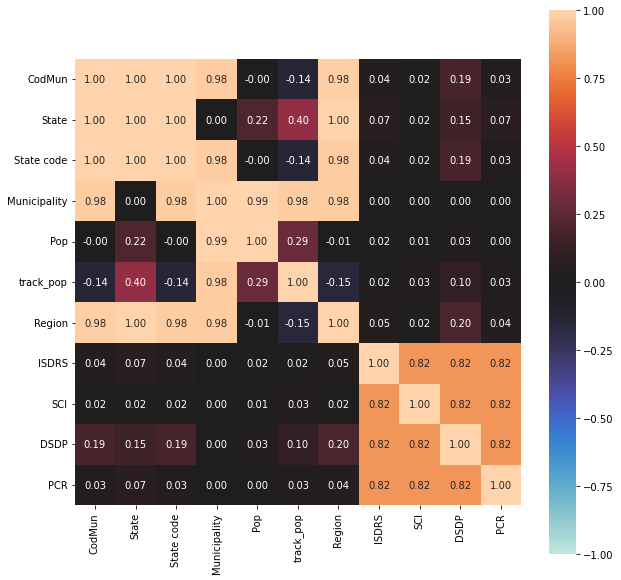

In [340]:
associations(df2,figsize=(10,10));

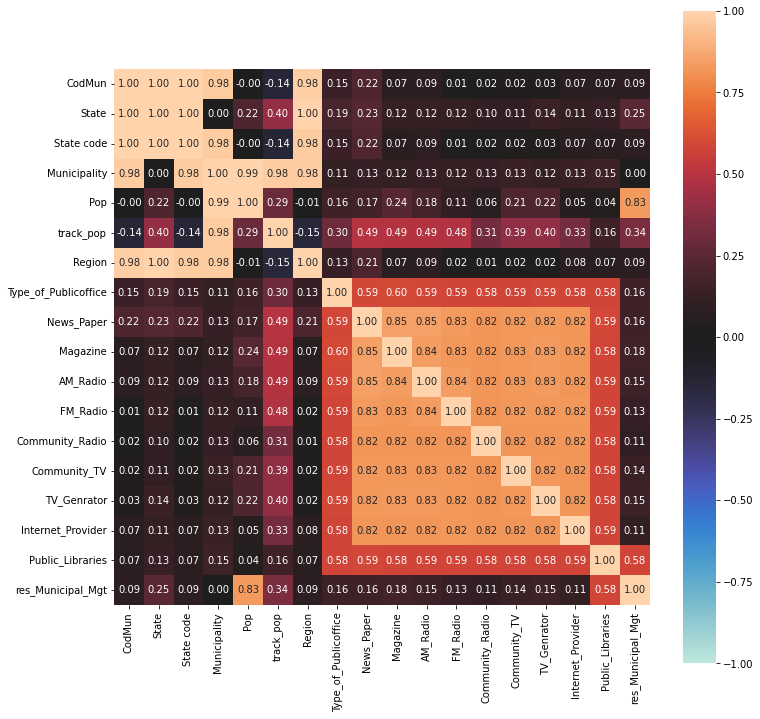

In [341]:
associations(df3,figsize = (12,12));

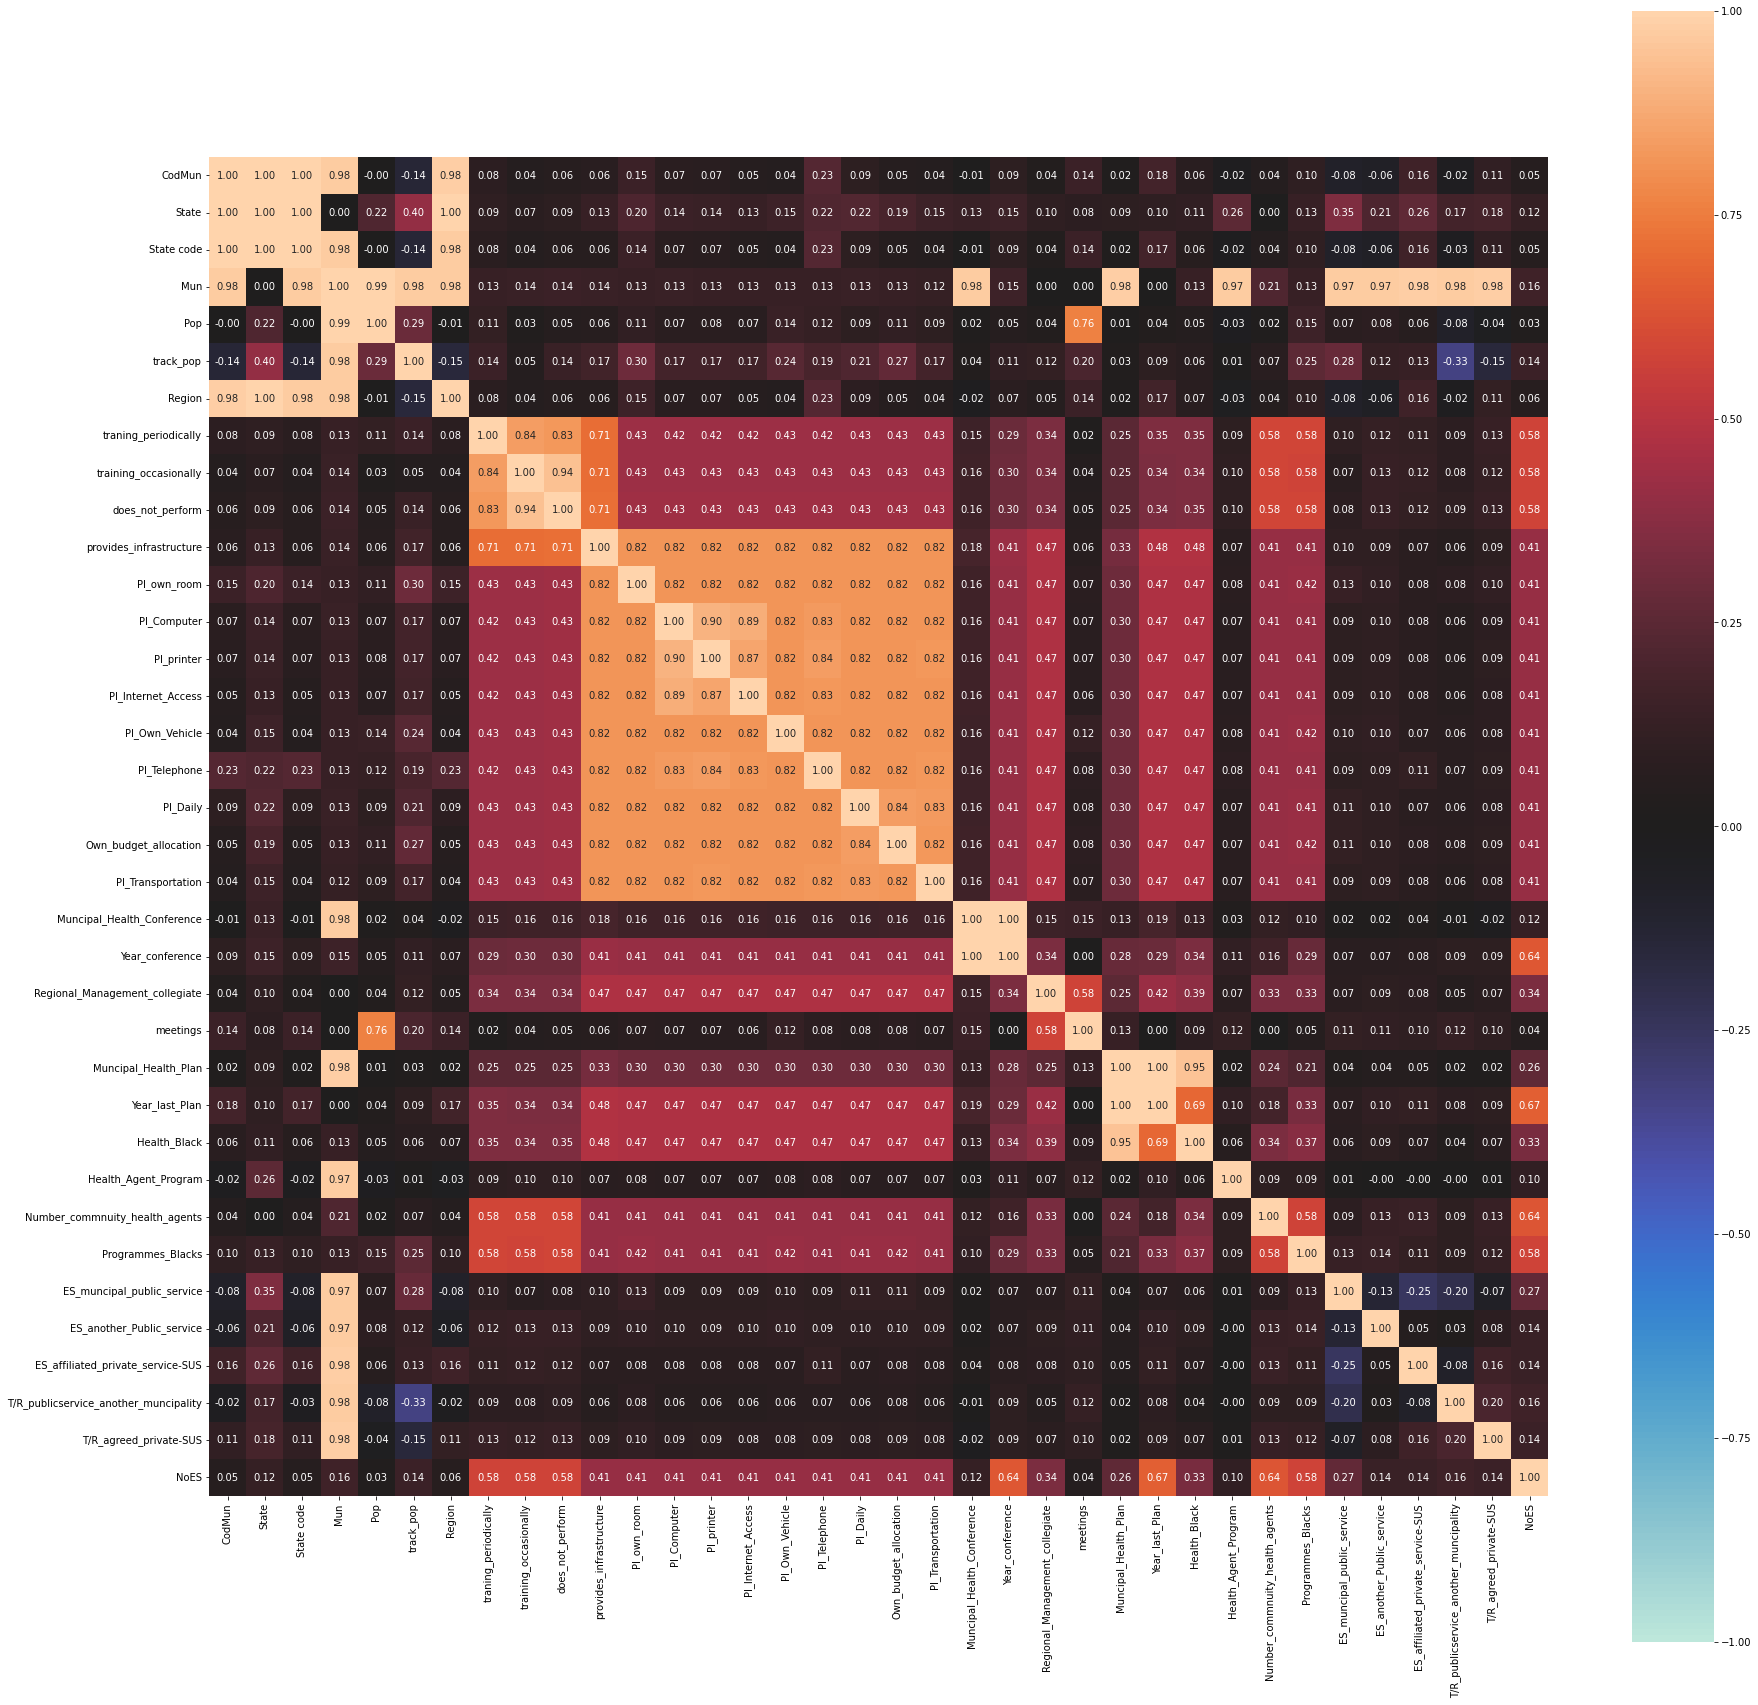

In [342]:
associations(df4,figsize=(30,30));

In [348]:
df4.columns

Index(['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference', 'Year_conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
       'Year_last_Plan', 'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES'],
      dtype='object')

df) Are there convergences or disparities between the more general characteristics of communities and the organization and public policies?

df.race, gender, education

df1.urban legislation /n

df2) Do education policies coincide with the educational level of respondents in the communities?

df3) Do the means of information available in the municipality (local newspaper, local radio) coincide with those that communities use to find out about local issues?

df4)  are the existing health equipment in the municipality those mentioned by the interviewees for them to use (and qualility of them)?

In [88]:
survay_data.columns

Index(['Date', 'Timestamp', 'Household Code', 'City', 'City Code',
       'Community Code', 'Community Type Specification',
       'Community type - Code', '(1) Number of family members',
       '(2) Age of Person Responsible',
       ...
       '(44.4) Was Paper media (such as Newspapers) the most relevant mode of information about sanitation/health? (No=0;Yes=1)',
       '(44.5) Was Social media the most relevant mode of information about sanitation/health? (No=0;Yes=1)',
       '(44.6) Was Social networks the most relevant mode of information about sanitation/health through? (No=0;Yes=1)',
       '(44.7) Was School the most relevant mode of information about sanitation/health? (No=0;Yes=1)',
       '(44.8) Was Church the most relevant mode of information about sanitation/health through? (No=0;Yes=1)',
       '(44.9) Is 'No response' given? No=0;Yes=1',
       '(44.10) Is there another source? No=0;Yes=1',
       '(45) If Other (or add some info/details), specify',
       '(45.1) If 

In [89]:
survay_data.tail(10)

,Date,Timestamp,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,...,(44.4) Was Paper media (such as Newspapers) the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.5) Was Social media the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.6) Was Social networks the most relevant mode of information about sanitation/health through? (No=0;Yes=1),(44.7) Was School the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.8) Was Church the most relevant mode of information about sanitation/health through? (No=0;Yes=1),(44.9) Is 'No response' given? No=0;Yes=1,(44.10) Is there another source? No=0;Yes=1,"(45) If Other (or add some info/details), specify","(45.1) If Other (or add some info/details), specify","(45.2) If Other (or add some info/details), specify - Code"
101,2022-11-09 02:20:26.968,02:20:27,08-BD-MCB,Baldim,3105004.0,5,Rural,4.0,3,18.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Not applicable,Not applicable,0.0
102,2022-11-09 02:37:35.133,02:37:35,01-BD-MCB,Baldim,3105004.0,5,Rural,4.0,4,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not applicable,Not applicable,0.0
103,2022-11-09 22:05:38.963,22:05:39,06-BD-MCB,Baldim,3105004.0,5,Rural,4.0,6,57.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Not applicable,Not applicable,0.0
104,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
survay_d_1 = survay_data[:104]
# we are removing the null valued rows of the table at the end 

In [98]:
survay_d_1.head()

,Date,Timestamp,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,...,(44.4) Was Paper media (such as Newspapers) the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.5) Was Social media the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.6) Was Social networks the most relevant mode of information about sanitation/health through? (No=0;Yes=1),(44.7) Was School the most relevant mode of information about sanitation/health? (No=0;Yes=1),(44.8) Was Church the most relevant mode of information about sanitation/health through? (No=0;Yes=1),(44.9) Is 'No response' given? No=0;Yes=1,(44.10) Is there another source? No=0;Yes=1,"(45) If Other (or add some info/details), specify","(45.1) If Other (or add some info/details), specify","(45.2) If Other (or add some info/details), specify - Code"
0,2022-11-05 20:14:17.314,20:14:17,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"The informant is From the Health Council, User...",Works within healthcare,1.0
1,2022-11-05 20:16:07.379,20:16:07,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,He was a member of the Regional Social Assista...,Works within healthcare,1.0
2,2022-11-05 20:42:46.933,20:42:47,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,youtube,YouTube,2.0
3,2022-11-05 21:30:45.789,21:30:46,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Not applicable,Not applicable,0.0
4,2022-11-05 22:06:08.905,22:06:09,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not applicable,Not applicable,0.0


In [99]:
survay_d_1[["(4) Level of Education","(4.1) Level of Education - Code"]].value_counts()

(4) Level of Education              (4.1) Level of Education - Code
Complete High School or equivalent  5.0                                39
A few years of elementary School    2.0                                29
Complete primary education          3.0                                13
Complete Higher Education           7.0                                10
No formal Schooling                 1.0                                 7
A few years of high School          4.0                                 3
Some years of higher education      6.0                                 3
dtype: int64

# df2) Do education policies coincide with the educational level of respondents in the communities?
    
    Here we are trying to find a relation between mayor education level and peoples education level from survay data.
No formal Schooling  - 0 - 1

A few years of elementary School - 1 - 2

Complete primary education - 2 - 3

A few years of high School - 3 - 4

Complete High School or equivalent - 4 - 5

Some years of higher education - 5 - 6

Complete Higher Education - 6,7,8,9 - 7

Elementary education (1st grade) incomplete" : 1,
"Complete Elementary School (1st Degree)": 2,
"Incomplete high school (2nd degree)" : 3,
"High school (2nd degree) complete" : 4,
"incomplete higher education" : 5,
"complete higher education" : 6,
"Master's degree" : 7,
 "Doctorate degree" : 8,
 "Specialization" : 9

In [168]:
df2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0,0,0,0
1,1100023,RO,11,Ariquemes,111148,6,1,0,0,1,0
2,1100031,RO,11,Cabixi,5067,2,1,0,0,0,1
3,1100049,RO,11,Cacoal,86416,5,1,0,0,1,0
4,1100056,RO,11,Cerejeiras,16088,3,1,0,0,0,0


 ISDRS = Inclusion of students with disabilities in regular schools,
 SCI = School-community integration (opening of schools to the community, use of collective
        spaces for routine school actions, among other actions)
 DSDP = Decrease in school dropout and dropout (active search for students)
 PCR = Public call for registration

In [169]:
surv_education = survay_d_1.iloc[:,2:34]
# we have taken only the disbility data from the survay data 

In [170]:
surv_education.head()

,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3) Gender (M=Male; F= Female),(3.1) Gender (M=Male; F= Female) - Code,...,(5.3.7) Is needing glasses one of the disabilities? No=0;Yes=1,(5.3.8) Is brain injury one of the disabilities? No=0;Yes=1,(5.3.9) Is a bedridden elderly one of the disabilities? No=0;Yes=1,(5.3.10) Is epilepsy one of the disabilities? No=0;Yes=1,(5.3.11) Is schizophrenia one of the disabilities? No=0;Yes=1,(5.3.12) Is muscle atrophy one of the disabilities? No=0;Yes=1,(6) Color/race (self-declared),(6.1) Color/race (self-declared) - Code,"(6.2) If Other, specify","(6.2.1) If Other, specify - Code"
0,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,M,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,White,1.0,Not applicable,0.0
1,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,F,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,White,1.0,Not applicable,0.0
2,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,F,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,White,1.0,Not applicable,0.0
3,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,M,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,White,1.0,Not applicable,0.0
4,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,F,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,White,1.0,Not applicable,0.0


In [171]:
surv_education.columns

Index(['Household Code', 'City', 'City Code', 'Community Code',
       'Community Type Specification', 'Community type - Code',
       '(1) Number of family members', '(2) Age of Person Responsible',
       '(3) Gender (M=Male; F= Female)',
       '(3.1) Gender (M=Male; F= Female) - Code', '(4) Level of Education',
       '(4.1) Level of Education - Code',
       '(5) Any member of the household with a disability?',
       '(5.1) Any member of the household with a disability? - Code',
       '(5.2) If yes, specify which disability',
       '(5.3) If yes, specify which disability - Standardised',
       '(5.3.1) Is infantile paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.2) Is a learning disability one of the disabilities? No=0;Yes=1',
       '(5.3.3) Is mobility problems one of the disabilities? No=0;Yes=1',
       '(5.3.4) Is hyperactivity one of the disabilities? No=0;Yes=1',
       '(5.3.5) Is attention deficit one of the disabilities? No=0;Yes=1',
       '(5.3.6) Is p

In [172]:
surv_education[['(5.2) If yes, specify which disability',
       '(5.3) If yes, specify which disability - Standardised']].value_counts()

(5.2) If yes, specify which disability  (5.3) If yes, specify which disability - Standardised
Not applicable                          Not applicable                                           90
Bedridden elderly                       Bedridden elderly                                         2
 Son has schizophrenia                  Schizophrenia                                             1
Attention deficit                       Attention deficit                                         1
Attention deficit and epilepsy          Attention deficit and epilepsy                            1
Daughter with brain injury              Brain injury                                              1
Elderly with mobility problem           Mobility problem                                          1
Epilepsy                                Epilepsy                                                  1
Glasses                                 Glasses                                                   1
Hypera

In [173]:
colms_dis = ['(5.3.1) Is infantile paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.2) Is a learning disability one of the disabilities? No=0;Yes=1',
       '(5.3.3) Is mobility problems one of the disabilities? No=0;Yes=1',
       '(5.3.4) Is hyperactivity one of the disabilities? No=0;Yes=1',
       '(5.3.5) Is attention deficit one of the disabilities? No=0;Yes=1',
       '(5.3.6) Is paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.7) Is needing glasses one of the disabilities? No=0;Yes=1',
       '(5.3.8) Is brain injury one of the disabilities? No=0;Yes=1',
       '(5.3.9) Is a bedridden elderly one of the disabilities? No=0;Yes=1',
       '(5.3.10) Is epilepsy one of the disabilities? No=0;Yes=1',
       '(5.3.11) Is schizophrenia one of the disabilities? No=0;Yes=1',
       '(5.3.12) Is muscle atrophy one of the disabilities? No=0;Yes=1']

In [174]:
surv_education[colms_dis] = surv_education[colms_dis].astype(int)

In [175]:
#surv_education['combined_disability'] = surv_education[colms_dis].apply(lambda row: ''.join([str(row[col]) for col in colms_dis])                                                                       , axis=1)


In [176]:
surv_education[colms_dis].head(10)

,(5.3.1) Is infantile paralysis one of the disabilities? No=0;Yes=1,(5.3.2) Is a learning disability one of the disabilities? No=0;Yes=1,(5.3.3) Is mobility problems one of the disabilities? No=0;Yes=1,(5.3.4) Is hyperactivity one of the disabilities? No=0;Yes=1,(5.3.5) Is attention deficit one of the disabilities? No=0;Yes=1,(5.3.6) Is paralysis one of the disabilities? No=0;Yes=1,(5.3.7) Is needing glasses one of the disabilities? No=0;Yes=1,(5.3.8) Is brain injury one of the disabilities? No=0;Yes=1,(5.3.9) Is a bedridden elderly one of the disabilities? No=0;Yes=1,(5.3.10) Is epilepsy one of the disabilities? No=0;Yes=1,(5.3.11) Is schizophrenia one of the disabilities? No=0;Yes=1,(5.3.12) Is muscle atrophy one of the disabilities? No=0;Yes=1
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0


In [177]:
surv_education['combined_disability'] = surv_education[colms_dis].apply(lambda row: ''.join([str(row[col]) for col in colms_dis])
                                                                        , axis=1)


we are trying to assign numbers to the disability by combining all the columns.

In [178]:
surv_ed_1 = surv_education

In [179]:
surv_ed_1['combined_disability'][9][0]

'0'

In [180]:
surv_ed_1.head()

,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3) Gender (M=Male; F= Female),(3.1) Gender (M=Male; F= Female) - Code,...,(5.3.8) Is brain injury one of the disabilities? No=0;Yes=1,(5.3.9) Is a bedridden elderly one of the disabilities? No=0;Yes=1,(5.3.10) Is epilepsy one of the disabilities? No=0;Yes=1,(5.3.11) Is schizophrenia one of the disabilities? No=0;Yes=1,(5.3.12) Is muscle atrophy one of the disabilities? No=0;Yes=1,(6) Color/race (self-declared),(6.1) Color/race (self-declared) - Code,"(6.2) If Other, specify","(6.2.1) If Other, specify - Code",combined_disability
0,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,M,1.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
1,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
2,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
3,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,M,1.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
4,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000


In [181]:
surv_education[colms_dis].columns

Index(['(5.3.1) Is infantile paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.2) Is a learning disability one of the disabilities? No=0;Yes=1',
       '(5.3.3) Is mobility problems one of the disabilities? No=0;Yes=1',
       '(5.3.4) Is hyperactivity one of the disabilities? No=0;Yes=1',
       '(5.3.5) Is attention deficit one of the disabilities? No=0;Yes=1',
       '(5.3.6) Is paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.7) Is needing glasses one of the disabilities? No=0;Yes=1',
       '(5.3.8) Is brain injury one of the disabilities? No=0;Yes=1',
       '(5.3.9) Is a bedridden elderly one of the disabilities? No=0;Yes=1',
       '(5.3.10) Is epilepsy one of the disabilities? No=0;Yes=1',
       '(5.3.11) Is schizophrenia one of the disabilities? No=0;Yes=1',
       '(5.3.12) Is muscle atrophy one of the disabilities? No=0;Yes=1'],
      dtype='object')

In [182]:
cl = ['inf_p','ld','mp','ha','ad','p','gl','bi','be','ep','sch','ma']

In [183]:
surv_education.columns[16:28]

Index(['(5.3.1) Is infantile paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.2) Is a learning disability one of the disabilities? No=0;Yes=1',
       '(5.3.3) Is mobility problems one of the disabilities? No=0;Yes=1',
       '(5.3.4) Is hyperactivity one of the disabilities? No=0;Yes=1',
       '(5.3.5) Is attention deficit one of the disabilities? No=0;Yes=1',
       '(5.3.6) Is paralysis one of the disabilities? No=0;Yes=1',
       '(5.3.7) Is needing glasses one of the disabilities? No=0;Yes=1',
       '(5.3.8) Is brain injury one of the disabilities? No=0;Yes=1',
       '(5.3.9) Is a bedridden elderly one of the disabilities? No=0;Yes=1',
       '(5.3.10) Is epilepsy one of the disabilities? No=0;Yes=1',
       '(5.3.11) Is schizophrenia one of the disabilities? No=0;Yes=1',
       '(5.3.12) Is muscle atrophy one of the disabilities? No=0;Yes=1'],
      dtype='object')

In [184]:
surv_education.rename(columns=dict(zip(surv_education.columns[16:28], cl)), inplace=True)

In [185]:
surv_education.head()

,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3) Gender (M=Male; F= Female),(3.1) Gender (M=Male; F= Female) - Code,...,bi,be,ep,sch,ma,(6) Color/race (self-declared),(6.1) Color/race (self-declared) - Code,"(6.2) If Other, specify","(6.2.1) If Other, specify - Code",combined_disability
0,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,M,1.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
1,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
2,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
3,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,M,1.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000
4,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,F,2.0,...,0,0,0,0,0,White,1.0,Not applicable,0.0,000000000000


In [186]:
surv_education.columns[16:28]

Index(['inf_p', 'ld', 'mp', 'ha', 'ad', 'p', 'gl', 'bi', 'be', 'ep', 'sch',
       'ma'],
      dtype='object')

In [193]:
surv_education.iloc[:,16:28];

In [ ]:
if surv_education.columns.isin(target_words).any():
    print("One or more target words are present in the column names.")

In [191]:
surv_education["name_disability"] = ''
for column_name in surv_education.columns[16:28]:
    if surv_education[column_name].any() == 1:
        surv_education.loc[surv_education[column_name] == 1, 'name_disability'] = column_name

In [192]:
surv_education.head(10)

,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3) Gender (M=Male; F= Female),(3.1) Gender (M=Male; F= Female) - Code,...,be,ep,sch,ma,(6) Color/race (self-declared),(6.1) Color/race (self-declared) - Code,"(6.2) If Other, specify","(6.2.1) If Other, specify - Code",combined_disability,name_disability
0,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,M,1.0,...,0,0,0,0,White,1.0,Not applicable,0.0,000000000000,
1,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,000000000000,
2,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,000000000000,
3,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,M,1.0,...,0,0,0,0,White,1.0,Not applicable,0.0,000000000000,
4,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,000000000000,
5,09-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,000000000000,
6,10-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,35.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,000000000000,
7,11-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,5,45.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,000000000000,
8,12-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,57.0,M,1.0,...,0,0,0,0,White,1.0,Not applicable,0.0,100000000000,inf_p
9,13-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,7,41.0,M,1.0,...,0,0,0,0,White,1.0,Not applicable,0.0,010000000000,ld


 we have created a column with disability names now we are combining all the columns with 0 and 1 codes 

In [120]:
#surv_education['combined_disability'] = surv_education['combined_disability'].applymap(lambda x: int(x, 2))

In [194]:
surv_ed_1['combined_disability'] = surv_ed_1['combined_disability'].apply(lambda x: int(x,2))

In [195]:
surv_education["combined_disability"] = surv_ed_1['combined_disability']

In [197]:
surv_education.head()

,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3) Gender (M=Male; F= Female),(3.1) Gender (M=Male; F= Female) - Code,...,be,ep,sch,ma,(6) Color/race (self-declared),(6.1) Color/race (self-declared) - Code,"(6.2) If Other, specify","(6.2.1) If Other, specify - Code",combined_disability,name_disability
0,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,M,1.0,...,0,0,0,0,White,1.0,Not applicable,0.0,0,
1,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,0,
2,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,0,
3,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,M,1.0,...,0,0,0,0,White,1.0,Not applicable,0.0,0,
4,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,F,2.0,...,0,0,0,0,White,1.0,Not applicable,0.0,0,


In [198]:
surv_education[['(6) Color/race (self-declared)','(6.1) Color/race (self-declared) - Code']].value_counts()

(6) Color/race (self-declared)  (6.1) Color/race (self-declared) - Code
Brown                           3.0                                        52
White                           1.0                                        24
Black                           2.0                                        21
I don't want to declare         7.0                                         2
Indigenous                      5.0                                         2
Other                           6.0                                         2
Yellow                          4.0                                         1
dtype: int64

In [200]:
surv_education_2 = surv_education.drop(columns=cl)

In [201]:
surv_education_2.head()

,Household Code,City,City Code,Community Code,Community Type Specification,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3) Gender (M=Male; F= Female),(3.1) Gender (M=Male; F= Female) - Code,...,(5) Any member of the household with a disability?,(5.1) Any member of the household with a disability? - Code,"(5.2) If yes, specify which disability","(5.3) If yes, specify which disability - Standardised",(6) Color/race (self-declared),(6.1) Color/race (self-declared) - Code,"(6.2) If Other, specify","(6.2.1) If Other, specify - Code",combined_disability,name_disability
0,04-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,46.0,M,1.0,...,No,0.0,Not applicable,Not applicable,White,1.0,Not applicable,0.0,0,
1,03-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,71.0,F,2.0,...,No,0.0,Not applicable,Not applicable,White,1.0,Not applicable,0.0,0,
2,02-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,6,50.0,F,2.0,...,No,0.0,Not applicable,Not applicable,White,1.0,Not applicable,0.0,0,
3,07-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,3,56.0,M,1.0,...,No,0.0,Not applicable,Not applicable,White,1.0,Not applicable,0.0,0,
4,08-BH-BRT,Belo Horizonte,3106200.0,3,Densely populated,1.0,4,54.0,F,2.0,...,No,0.0,Not applicable,Not applicable,White,1.0,Not applicable,0.0,0,


In [202]:
 surv_education_2.columns

Index(['Household Code', 'City', 'City Code', 'Community Code',
       'Community Type Specification', 'Community type - Code',
       '(1) Number of family members', '(2) Age of Person Responsible',
       '(3) Gender (M=Male; F= Female)',
       '(3.1) Gender (M=Male; F= Female) - Code', '(4) Level of Education',
       '(4.1) Level of Education - Code',
       '(5) Any member of the household with a disability?',
       '(5.1) Any member of the household with a disability? - Code',
       '(5.2) If yes, specify which disability',
       '(5.3) If yes, specify which disability - Standardised',
       '(6) Color/race (self-declared)',
       '(6.1) Color/race (self-declared) - Code', '(6.2) If Other, specify',
       '(6.2.1) If Other, specify - Code', 'combined_disability',
       'name_disability'],
      dtype='object')

In [203]:
col_drop = ['Household Code','Community Type Specification','(3) Gender (M=Male; F= Female)','(4) Level of Education',
            '(5) Any member of the household with a disability?','(6) Color/race (self-declared)',
            '(6.2) If Other, specify',"(5.3) If yes, specify which disability - Standardised",
            '(5.2) If yes, specify which disability']

In [204]:
surv_education_3 = surv_education_2.drop(columns=col_drop)

In [205]:
surv_education_3.head()

,City,City Code,Community Code,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3.1) Gender (M=Male; F= Female) - Code,(4.1) Level of Education - Code,(5.1) Any member of the household with a disability? - Code,(6.1) Color/race (self-declared) - Code,"(6.2.1) If Other, specify - Code",combined_disability,name_disability
0,Belo Horizonte,3106200.0,3,1.0,3,46.0,1.0,5.0,0.0,1.0,0.0,0,
1,Belo Horizonte,3106200.0,3,1.0,4,71.0,2.0,7.0,0.0,1.0,0.0,0,
2,Belo Horizonte,3106200.0,3,1.0,6,50.0,2.0,7.0,0.0,1.0,0.0,0,
3,Belo Horizonte,3106200.0,3,1.0,3,56.0,1.0,5.0,0.0,1.0,0.0,0,
4,Belo Horizonte,3106200.0,3,1.0,4,54.0,2.0,6.0,0.0,1.0,0.0,0,


In [206]:
surv_education_3.iloc[:,1:].columns

Index(['City Code', 'Community Code', 'Community type - Code',
       '(1) Number of family members', '(2) Age of Person Responsible',
       '(3.1) Gender (M=Male; F= Female) - Code',
       '(4.1) Level of Education - Code',
       '(5.1) Any member of the household with a disability? - Code',
       '(6.1) Color/race (self-declared) - Code',
       '(6.2.1) If Other, specify - Code', 'combined_disability',
       'name_disability'],
      dtype='object')

In [207]:
numeric_columns = surv_education_3.select_dtypes(include='number').columns
surv_education_3[numeric_columns] = surv_education_3[numeric_columns].astype(int)

In [208]:
surv_education_3.head()

,City,City Code,Community Code,Community type - Code,(1) Number of family members,(2) Age of Person Responsible,(3.1) Gender (M=Male; F= Female) - Code,(4.1) Level of Education - Code,(5.1) Any member of the household with a disability? - Code,(6.1) Color/race (self-declared) - Code,"(6.2.1) If Other, specify - Code",combined_disability,name_disability
0,Belo Horizonte,3106200,3,1,3,46,1,5,0,1,0,0,
1,Belo Horizonte,3106200,3,1,4,71,2,7,0,1,0,0,
2,Belo Horizonte,3106200,3,1,6,50,2,7,0,1,0,0,
3,Belo Horizonte,3106200,3,1,3,56,1,5,0,1,0,0,
4,Belo Horizonte,3106200,3,1,4,54,2,6,0,1,0,0,


In [209]:
surv_education_3.dtypes

City                                                           object
City Code                                                       int64
Community Code                                                 object
Community type - Code                                           int64
(1) Number of family members                                   object
(2) Age of Person Responsible                                   int64
(3.1) Gender (M=Male; F= Female) - Code                         int64
(4.1) Level of Education - Code                                 int64
(5.1) Any member of the household with a disability? - Code     int64
(6.1) Color/race (self-declared) - Code                         int64
(6.2.1) If Other, specify - Code                                int64
combined_disability                                             int64
name_disability                                                object
dtype: object

In [210]:
surv_education_3["Community Code"].value_counts()

3     13
6     13
8A    13
2     13
4     13
1     13
5     13
7      8
8B     5
Name: Community Code, dtype: int64

In [211]:
surv_education_3["(1) Number of family members"].value_counts()

3               27
4               20
2               18
5               14
1               12
6                6
7                5
10               1
More than 10     1
Name: (1) Number of family members, dtype: int64

In [212]:
surv_education_3.columns

Index(['City', 'City Code', 'Community Code', 'Community type - Code',
       '(1) Number of family members', '(2) Age of Person Responsible',
       '(3.1) Gender (M=Male; F= Female) - Code',
       '(4.1) Level of Education - Code',
       '(5.1) Any member of the household with a disability? - Code',
       '(6.1) Color/race (self-declared) - Code',
       '(6.2.1) If Other, specify - Code', 'combined_disability',
       'name_disability'],
      dtype='object')

In [214]:
surv_education_3.columns = ['City','City_Code', 'Community', 'Community_type',
       'family_size', 'family_head_age',
       'Gender',
       'Education',
       'disability',
       'Ethnicity',
       'other_ethnicity','disability_code_combined',"name_disability"]

In [216]:
surv_education_3.head(10)

,City,City_Code,Community,Community_type,family_size,family_head_age,Gender,Education,disability,Ethnicity,other_ethnicity,disability_code_combined,name_disability
0,Belo Horizonte,3106200,3,1,3,46,1,5,0,1,0,0,
1,Belo Horizonte,3106200,3,1,4,71,2,7,0,1,0,0,
2,Belo Horizonte,3106200,3,1,6,50,2,7,0,1,0,0,
3,Belo Horizonte,3106200,3,1,3,56,1,5,0,1,0,0,
4,Belo Horizonte,3106200,3,1,4,54,2,6,0,1,0,0,
5,Belo Horizonte,3106200,3,1,3,56,2,5,0,1,0,0,
6,Belo Horizonte,3106200,3,1,3,35,2,7,0,1,0,0,
7,Belo Horizonte,3106200,3,1,5,45,2,7,0,1,0,0,
8,Belo Horizonte,3106200,3,1,4,57,1,3,1,1,0,2048,inf_p
9,Belo Horizonte,3106200,3,1,7,41,1,7,1,1,0,1024,ld


In [215]:
surv_education_3["City_Code"].value_counts()

3106200    44
3154606    13
3144805    13
3136603    13
3105004    13
3118601     8
Name: City_Code, dtype: int64

In [217]:
surv_education_3["disability_code_combined"].value_counts()

0       90
8        2
2048     1
1024     1
512      1
256      1
128      1
64       1
32       1
16       1
132      1
4        1
2        1
1        1
Name: disability_code_combined, dtype: int64

In [233]:
df2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0,0,0,0
1,1100023,RO,11,Ariquemes,111148,6,1,0,0,1,0
2,1100031,RO,11,Cabixi,5067,2,1,0,0,0,1
3,1100049,RO,11,Cacoal,86416,5,1,0,0,1,0
4,1100056,RO,11,Cerejeiras,16088,3,1,0,0,0,0


In [234]:
#df2_education = df2.query(" Mun in ['Belo Horizonte','Ribeirão das Neves','Nova Lima','Nova União','Baldim','Contagem']")

In [225]:
col_codemun  = surv_education_3["City_Code"].unique()

In [226]:
col_codemun

array([3106200, 3154606, 3118601, 3144805, 3136603, 3105004])

In [228]:
df2_education = df2.query(" CodMun in [3106200, 3154606, 3118601, 3144805, 3136603, 3105004]")

In [232]:
df2_education.columns = ['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'ISDRS', 'SCI', 'DSDP', 'PCR']

In [235]:
df2_education

,CodMun,State,State code,Mun,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
2298,3105004,MG,31,Baldim,7780,2,3,0,0,0,0
2309,3106200,MG,31,Belo Horizonte,2530701,7,3,0,0,0,0
2448,3118601,MG,31,Contagem,673849,7,3,0,0,1,0
2661,3136603,MG,31,Nova União,5739,2,3,1,0,0,0
2763,3144805,MG,31,Nova Lima,97378,5,3,1,0,0,0
2880,3154606,MG,31,Ribeirão das Neves,341415,6,3,1,0,1,1


 ISDRS = Inclusion of students with disabilities in regular schools,
 SCI = School-community integration (opening of schools to the community, use of collective
        spaces for routine school actions, among other actions)
 DSDP = Decrease in school dropout and dropout (active search for students)
 PCR = Public call for registration

1.muncipilaties nova uniao(MG), nova lima(MG) and Ribeirão das Neves(MG) have laws that are imposed for Inclusion of students with disabilities in regular schools

2.Contagem(MG) and Ribeirão das Neves(MG) have imposed laws to active search of students

3.Ribeirão das Neves(MG) imposed law for public call for regestration

Now i have to plot how disbalities are educated with survey data 

In [236]:
surv_education_3.head()

,City,City_Code,Community,Community_type,family_size,family_head_age,Gender,Education,disability,Ethnicity,other_ethnicity,disability_code_combined,name_disability
0,Belo Horizonte,3106200,3,1,3,46,1,5,0,1,0,0,
1,Belo Horizonte,3106200,3,1,4,71,2,7,0,1,0,0,
2,Belo Horizonte,3106200,3,1,6,50,2,7,0,1,0,0,
3,Belo Horizonte,3106200,3,1,3,56,1,5,0,1,0,0,
4,Belo Horizonte,3106200,3,1,4,54,2,6,0,1,0,0,


In [237]:
surv_education_3

,City,City_Code,Community,Community_type,family_size,family_head_age,Gender,Education,disability,Ethnicity,other_ethnicity,disability_code_combined,name_disability
0,Belo Horizonte,3106200,3,1,3,46,1,5,0,1,0,0,
1,Belo Horizonte,3106200,3,1,4,71,2,7,0,1,0,0,
2,Belo Horizonte,3106200,3,1,6,50,2,7,0,1,0,0,
3,Belo Horizonte,3106200,3,1,3,56,1,5,0,1,0,0,
4,Belo Horizonte,3106200,3,1,4,54,2,6,0,1,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Baldim,3105004,5,4,5,20,1,5,0,3,0,0,
100,Baldim,3105004,5,4,3,54,2,5,0,3,0,0,
101,Baldim,3105004,5,4,3,18,2,5,0,3,0,0,
102,Baldim,3105004,5,4,4,35,2,7,0,3,0,0,


In [238]:
df2_education["CodMun"]

2298    3105004
2309    3106200
2448    3118601
2661    3136603
2763    3144805
2880    3154606
Name: CodMun, dtype: int64

In [239]:
f = []
for x in range(len(df2_education)):
    d = df2_education["CodMun"]
    f.append(d)


In [240]:
df2_education

,CodMun,State,State code,Mun,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
2298,3105004,MG,31,Baldim,7780,2,3,0,0,0,0
2309,3106200,MG,31,Belo Horizonte,2530701,7,3,0,0,0,0
2448,3118601,MG,31,Contagem,673849,7,3,0,0,1,0
2661,3136603,MG,31,Nova União,5739,2,3,1,0,0,0
2763,3144805,MG,31,Nova Lima,97378,5,3,1,0,0,0
2880,3154606,MG,31,Ribeirão das Neves,341415,6,3,1,0,1,1


In [241]:
surv_education_3.head()

,City,City_Code,Community,Community_type,family_size,family_head_age,Gender,Education,disability,Ethnicity,other_ethnicity,disability_code_combined,name_disability
0,Belo Horizonte,3106200,3,1,3,46,1,5,0,1,0,0,
1,Belo Horizonte,3106200,3,1,4,71,2,7,0,1,0,0,
2,Belo Horizonte,3106200,3,1,6,50,2,7,0,1,0,0,
3,Belo Horizonte,3106200,3,1,3,56,1,5,0,1,0,0,
4,Belo Horizonte,3106200,3,1,4,54,2,6,0,1,0,0,


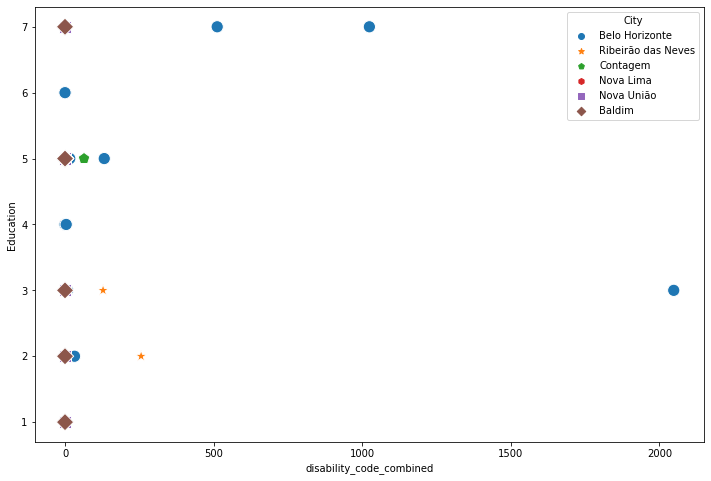

In [242]:
markers = {"Belo Horizonte" : "o","Nova União": "s",'Baldim': "D", 'Contagem':"p",
           'Nova Lima':"h", 'Ribeirão das Neves':"*" }
plt.figure(figsize=(12,8))
sns.scatterplot(surv_education_3,x="disability_code_combined",y = "Education",hue = "City",
                style="City", markers=markers, s = 150)
#plt.xlim(-20,100)
#plt.xscale("log")
plt.show()

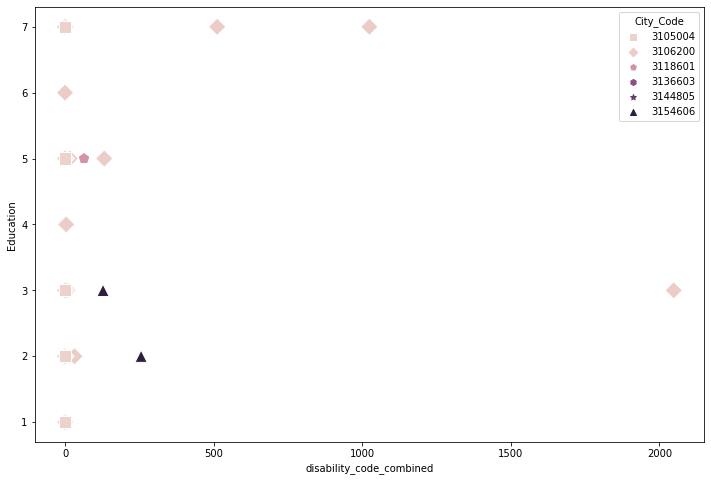

In [251]:
markers = {3105004: "s",3106200: "D", 3118601:"p",
           3136603:"h", 3144805:"*",3154606 :"^" }
plt.figure(figsize=(12,8))
sns.scatterplot(surv_education_3,x="disability_code_combined",y = "Education",hue = "City_Code",
                style="City_Code", markers=markers, s = 150)
#plt.xlim(-20,100)
#plt.xscale("log")
plt.show()

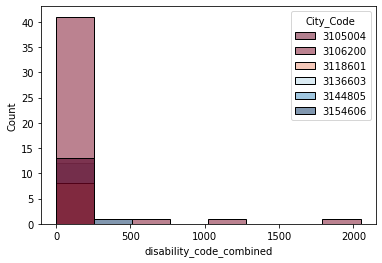

In [258]:
colors = ['blue', 'green', 'orange', 'red', 'purple', 'yellow']
palette_colors = {3105004: "blue",3106200: "green", 3118601:"orange",
           3136603:"light red", 3144805:"purple",3154606 :"yellow"}
sns.histplot(surv_education_3,x="disability_code_combined",hue="City_Code",palette='RdBu')

#plt.ylim(0,20)
plt.show()

<Axes: xlabel='disability_code_combined', ylabel='Count'>

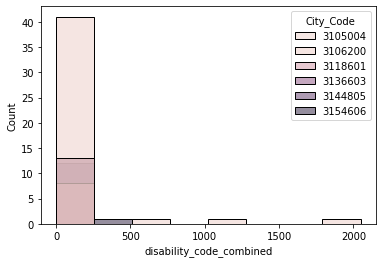

In [259]:
sns.histplot(surv_education_3,x="disability_code_combined",hue="City_Code")


In [ ]:
df.head(2)

In [ ]:
df.loc[0]

In [ ]:
df.dtypes

In [ ]:
df.columns

In [260]:
c_df = df[['CodMun',  'State_code', 'Estimated pop 2021',
       'track_pop', 'Region', 'Gender', 'Mayor_Age', 'Mayor_Ethnicity',
       'Ed_of_Mayor', 'Projects_aimed_at_RuralEducation']]

In [261]:
c_df.head()

,CodMun,State_code,Estimated pop 2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1100015,11,22516,4,1,1.0,40.0,1.0,9.0,1
1,1100023,11,111148,6,1,0.0,33.0,1.0,6.0,1
2,1100031,11,5067,2,1,1.0,50.0,2.0,6.0,1
3,1100049,11,86416,5,1,1.0,35.0,2.0,6.0,1
4,1100056,11,16088,3,1,0.0,57.0,1.0,6.0,-


In [265]:
c_df = c_df.dropna()

In [271]:
c_df = c_df.replace({'-':99})

In [273]:
c_df = c_df.astype(int)

In [274]:
c_df["Projects_aimed_at_RuralEducation"].value_counts()

1     2586
99    2337
0      632
3        2
Name: Projects_aimed_at_RuralEducation, dtype: int64

In [275]:
df1.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0.0,0.0,0.0
1,1100023,RO,11,Ariquemes,111148,6,1,2.0,2.0,2.0
2,1100031,RO,11,Cabixi,5067,2,1,0.0,0.0,0.0
3,1100049,RO,11,Cacoal,86416,5,1,1.0,0.0,1.0
4,1100056,RO,11,Cerejeiras,16088,3,1,0.0,2.0,1.0


In [276]:
df1.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'Concession_special_use_for_housing', 'Legitamate_Posession',
       'Environmental_impact'],
      dtype='object')

In [277]:
c_df1 = df1 [['CodMun',  'State code', 'Pop', 'track_pop',
       'Region', 'Concession_special_use_for_housing', 'Legitamate_Posession',
       'Environmental_impact']]

In [278]:
c_df1.head()

,CodMun,State code,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
0,1100015,11,22516,4,1,0.0,0.0,0.0
1,1100023,11,111148,6,1,2.0,2.0,2.0
2,1100031,11,5067,2,1,0.0,0.0,0.0
3,1100049,11,86416,5,1,1.0,0.0,1.0
4,1100056,11,16088,3,1,0.0,2.0,1.0


In [279]:
c_df1.loc[1].corr(c_df1.loc[2])

0.995341650067377

In [280]:
c_df1.T.corr()

,0,1,2,3,4,5,6,7,8,9,...,5560,5561,5562,5563,5564,5565,5566,5567,5568,5569
0,1.000000,0.996737,0.999876,0.998309,0.999983,0.999978,0.999902,0.999996,0.999955,0.999755,...,0.999922,0.999843,0.999805,0.999914,0.999808,0.999844,0.999827,0.999818,0.999816,0.856592
1,0.996737,1.000000,0.995342,0.999743,0.996251,0.996182,0.995512,0.996494,0.997459,0.998280,...,0.995649,0.995152,0.994950,0.997711,0.994965,0.995158,0.995062,0.995014,0.995005,0.895447
2,0.999876,0.995342,1.000000,0.997270,0.999951,0.999958,0.999998,0.999918,0.999681,0.999282,...,0.999995,0.999998,0.999992,0.999583,0.999993,0.999998,0.999996,0.999994,0.999994,0.848357
3,0.998309,0.999743,0.997270,1.000000,0.997955,0.997904,0.997400,0.998134,0.998817,0.999351,...,0.997504,0.997124,0.996968,0.998987,0.996980,0.997129,0.997055,0.997018,0.997010,0.885135
4,0.999983,0.996251,0.999951,0.997955,1.000000,1.000000,0.999967,0.999996,0.999883,0.999609,...,0.999978,0.999929,0.999903,0.999820,0.999905,0.999930,0.999918,0.999912,0.999911,0.853578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,0.999844,0.995158,0.999998,0.997129,0.999930,0.999939,0.999993,0.999892,0.999632,0.999209,...,0.999987,1.000000,0.999998,0.999526,0.999998,1.000000,1.000000,0.999999,0.999999,0.847355
5566,0.999827,0.995062,0.999996,0.997055,0.999918,0.999928,0.999989,0.999877,0.999605,0.999170,...,0.999981,1.000000,0.999999,0.999496,1.000000,1.000000,1.000000,1.000000,1.000000,0.846842
5567,0.999818,0.995014,0.999994,0.997018,0.999912,0.999922,0.999987,0.999870,0.999591,0.999150,...,0.999978,0.999999,1.000000,0.999481,1.000000,0.999999,1.000000,1.000000,1.000000,0.846585
5568,0.999816,0.995005,0.999994,0.997010,0.999911,0.999921,0.999986,0.999868,0.999588,0.999146,...,0.999978,0.999999,1.000000,0.999477,1.000000,0.999999,1.000000,1.000000,1.000000,0.846533


In [281]:
muncipality_codes = surv_education_3["City_Code"]

In [282]:
s_c_df1 = c_df1[c_df1['CodMun'].isin(muncipality_codes)]
# this data is muncipalities that are the survay conducted

In [283]:
s_c_df1

,CodMun,State code,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
2298,3105004,31,7780,2,3,1.0,2.0,1.0
2309,3106200,31,2530701,7,3,2.0,0.0,1.0
2448,3118601,31,673849,7,3,0.0,0.0,0.0
2661,3136603,31,5739,2,3,0.0,0.0,0.0
2763,3144805,31,97378,5,3,2.0,2.0,2.0
2880,3154606,31,341415,6,3,1.0,1.0,1.0


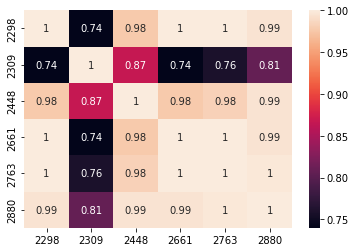

In [284]:
heatmap = sns.heatmap(s_c_df1.T.corr(),annot =True)

In [486]:
leg_plan = s_c_df1.T.corr()

In [285]:
df1.iloc[2880]

CodMun                                           3154606
State                                                 MG
State code                                            31
Municipality                          Ribeirão das Neves
Pop                                               341415
track_pop                                              6
Region                                                 3
Concession_special_use_for_housing                   1.0
Legitamate_Posession                                 1.0
Environmental_impact                                 1.0
Name: 2880, dtype: object

In [286]:
xt = 

SyntaxError: invalid syntax (1792657945.py, line 1)

In [287]:
ndf1 = df1[df1['CodMun'].isin(muncipality_codes)]
# we are taking survay data muncipality codes from mayor(MUNCI) data 

In [398]:
ndf1

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
2298,3105004,MG,31,Baldim,7780,2,3,1.0,2.0,1.0
2309,3106200,MG,31,Belo Horizonte,2530701,7,3,2.0,0.0,1.0
2448,3118601,MG,31,Contagem,673849,7,3,0.0,0.0,0.0
2661,3136603,MG,31,Nova União,5739,2,3,0.0,0.0,0.0
2763,3144805,MG,31,Nova Lima,97378,5,3,2.0,2.0,2.0
2880,3154606,MG,31,Ribeirão das Neves,341415,6,3,1.0,1.0,1.0


In [288]:
mncp = ndf1["Municipality"]

In [289]:
s_c_df1.index

Int64Index([2298, 2309, 2448, 2661, 2763, 2880], dtype='int64')

In [290]:
ndf1

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
2298,3105004,MG,31,Baldim,7780,2,3,1.0,2.0,1.0
2309,3106200,MG,31,Belo Horizonte,2530701,7,3,2.0,0.0,1.0
2448,3118601,MG,31,Contagem,673849,7,3,0.0,0.0,0.0
2661,3136603,MG,31,Nova União,5739,2,3,0.0,0.0,0.0
2763,3144805,MG,31,Nova Lima,97378,5,3,2.0,2.0,2.0
2880,3154606,MG,31,Ribeirão das Neves,341415,6,3,1.0,1.0,1.0


In [291]:
mncp

2298                Baldim
2309        Belo Horizonte
2448              Contagem
2661            Nova União
2763             Nova Lima
2880    Ribeirão das Neves
Name: Municipality, dtype: object

In [292]:
s_c_df1.index = mncp

In [293]:
s_c_df1

,CodMun,State code,Pop,track_pop,Region,Concession_special_use_for_housing,Legitamate_Posession,Environmental_impact
Municipality,,,,,,,,
Baldim,3105004,31,7780,2,3,1.0,2.0,1.0
Belo Horizonte,3106200,31,2530701,7,3,2.0,0.0,1.0
Contagem,3118601,31,673849,7,3,0.0,0.0,0.0
Nova União,3136603,31,5739,2,3,0.0,0.0,0.0
Nova Lima,3144805,31,97378,5,3,2.0,2.0,2.0
Ribeirão das Neves,3154606,31,341415,6,3,1.0,1.0,1.0


In [490]:
s_c_df1["Legitamate_Posession"].value_counts()

0.0    3
2.0    2
1.0    1
Name: Legitamate_Posession, dtype: int64

In [294]:
net1 = s_c_df1.T

In [487]:
net1

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
CodMun,3105004.0,3106200.0,3118601.0,3136603.0,3144805.0,3154606.0
State code,31.0,31.0,31.0,31.0,31.0,31.0
Pop,7780.0,2530701.0,673849.0,5739.0,97378.0,341415.0
track_pop,2.0,7.0,7.0,2.0,5.0,6.0
Region,3.0,3.0,3.0,3.0,3.0,3.0
Concession_special_use_for_housing,1.0,2.0,0.0,0.0,2.0,1.0
Legitamate_Posession,2.0,0.0,0.0,0.0,2.0,1.0
Environmental_impact,1.0,1.0,0.0,0.0,2.0,1.0


In [488]:
leg_plan = net1[5:].corr()

In [572]:
nnet = net1[5:]
nnet.columns

Index(['Baldim', 'Belo Horizonte', 'Contagem', 'Nova União', 'Nova Lima',
       'Ribeirão das Neves'],
      dtype='object', name='Municipality')

In [574]:
leg_plan_n = nnet[['Baldim', 'Belo Horizonte', 'Nova Lima',
       'Ribeirão das Neves']]

In [575]:
leg_plan_n.corr()

Municipality,Baldim,Belo Horizonte,Nova Lima,Ribeirão das Neves
Municipality,,,,
Baldim,1.000000,-0.866025,NaN,NaN
Belo Horizonte,-0.866025,1.000000,NaN,NaN
Nova Lima,NaN,NaN,NaN,NaN
Ribeirão das Neves,NaN,NaN,NaN,NaN


In [489]:

leg_plan

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
Municipality,,,,,,
Baldim,1.000000,-0.866025,NaN,NaN,NaN,NaN
Belo Horizonte,-0.866025,1.000000,NaN,NaN,NaN,NaN
Contagem,NaN,NaN,NaN,NaN,NaN,NaN
Nova União,NaN,NaN,NaN,NaN,NaN,NaN
Nova Lima,NaN,NaN,NaN,NaN,NaN,NaN
Ribeirão das Neves,NaN,NaN,NaN,NaN,NaN,NaN


In [494]:
leg_plan.to_csv('leg_plan.csv',index=False)

<Axes: xlabel='Municipality', ylabel='Municipality'>

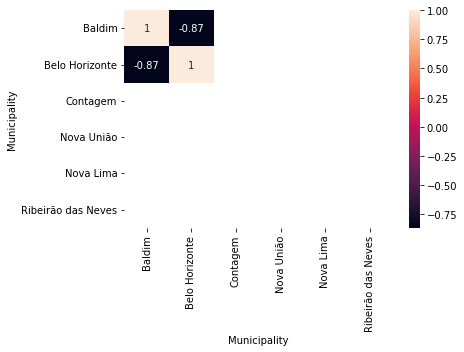

In [296]:
sns.heatmap(net1[5:].corr(),annot = True)

In [297]:
net1[3:]

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
track_pop,2.0,7.0,7.0,2.0,5.0,6.0
Region,3.0,3.0,3.0,3.0,3.0,3.0
Concession_special_use_for_housing,1.0,2.0,0.0,0.0,2.0,1.0
Legitamate_Posession,2.0,0.0,0.0,0.0,2.0,1.0
Environmental_impact,1.0,1.0,0.0,0.0,2.0,1.0


<Axes: xlabel='Municipality', ylabel='Municipality'>

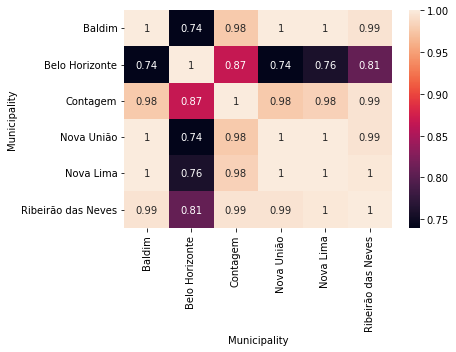

In [298]:
sns.heatmap(s_c_df1.T.corr(),annot =True)

In [299]:
df2.head()

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0,0,0,0
1,1100023,RO,11,Ariquemes,111148,6,1,0,0,1,0
2,1100031,RO,11,Cabixi,5067,2,1,0,0,0,1
3,1100049,RO,11,Cacoal,86416,5,1,0,0,1,0
4,1100056,RO,11,Cerejeiras,16088,3,1,0,0,0,0


In [308]:
df2

,CodMun,State,State code,Mun,Pop,track_pop,Region,Medu113,Medu116,Medu1114,Medu1115
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,0,0,0,0
1,1100023,RO,11,Ariquemes,111148,6,1,0,0,1,0
2,1100031,RO,11,Cabixi,5067,2,1,0,0,0,1
3,1100049,RO,11,Cacoal,86416,5,1,0,0,1,0
4,1100056,RO,11,Cerejeiras,16088,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,52,Vianópolis,14088,3,5,0,0,0,0
5566,5222054,GO,52,Vicentinópolis,9002,2,5,0,0,0,0
5567,5222203,GO,52,Vila Boa,6451,2,5,0,1,0,0
5568,5222302,GO,52,Vila Propício,5941,2,5,0,0,0,0


In [301]:
df2.columns

Index(['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region',
       'Medu113', 'Medu116', 'Medu1114', 'Medu1115'],
      dtype='object')

In [310]:
df2.columns = ['CodMun', 'State', 'State code', 'Mun', 'Pop', 'track_pop', 'Region','ISDRS', 'SCI', 'DSDP', 'PCR']

In [311]:
c_df2 = df2[['CodMun', 'State code', 'Pop', 'track_pop',
       'Region', 'ISDRS', 'SCI', 'DSDP', 'PCR']] 

In [312]:
c_df2.head()

,CodMun,State code,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
0,1100015,11,22516,4,1,0,0,0,0
1,1100023,11,111148,6,1,0,0,1,0
2,1100031,11,5067,2,1,0,0,0,1
3,1100049,11,86416,5,1,0,0,1,0
4,1100056,11,16088,3,1,0,0,0,0


In [313]:
s_c_df2 = c_df2[c_df2['CodMun'].isin(muncipality_codes)]# for survay data 

In [314]:
s_c_df2

,CodMun,State code,Pop,track_pop,Region,ISDRS,SCI,DSDP,PCR
2298,3105004,31,7780,2,3,0,0,0,0
2309,3106200,31,2530701,7,3,0,0,0,0
2448,3118601,31,673849,7,3,0,0,1,0
2661,3136603,31,5739,2,3,1,0,0,0
2763,3144805,31,97378,5,3,1,0,0,0
2880,3154606,31,341415,6,3,1,0,1,1


In [500]:
s_c_df2.T

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
CodMun,3105004,3106200,3118601,3136603,3144805,3154606
State code,31,31,31,31,31,31
Pop,7780,2530701,673849,5739,97378,341415
track_pop,2,7,7,2,5,6
Region,3,3,3,3,3,3
ISDRS,0,0,0,1,1,1
SCI,0,0,0,0,0,0
DSDP,0,0,1,0,0,1
PCR,0,0,0,0,0,1


In [394]:
heatmap = sns.heatmap(s_c_df2.T.corr(),annot =True)

ValueError: zero-size array to reduction operation fmin which has no identity

In [497]:
s_c_df2.index = mncp

In [592]:
ed = s_c_df2.iloc[2::]

In [510]:
ed_laws = s_c_df2.T.iloc[5::,2::]

In [511]:
ed_laws.to_csv('ed_laws',index = False)

In [514]:
ed_laws

Municipality,Contagem,Nova União,Nova Lima,Ribeirão das Neves
ISDRS,0,1,1,1
SCI,0,0,0,0
DSDP,1,0,0,1
PCR,0,0,0,1


In [586]:
ed_laws.iloc[0::,0::]

Municipality,Contagem,Nova União,Nova Lima,Ribeirão das Neves
ISDRS,0,1,1,1
SCI,0,0,0,0
DSDP,1,0,0,1
PCR,0,0,0,1


In [349]:
df3.head()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,Secretariat in conjunction with other sectoral...,0,0,0,1,1,0,1,1,1,1
1,1100023,RO,11,Ariquemes,111148,6,1,Sector subordinated directly to the head of th...,0,1,1,1,1,0,0,1,1,1
2,1100031,RO,11,Cabixi,5067,2,1,Secretariat in conjunction with other sectoral...,0,0,1,1,1,0,0,1,1,1
3,1100049,RO,11,Cacoal,86416,5,1,Indirect management body,1,1,0,1,1,0,0,1,1,2
4,1100056,RO,11,Cerejeiras,16088,3,1,Secretariat in conjunction with other sectoral...,0,0,0,1,1,0,0,1,1,1


In [351]:
df3["Type_of_Publicoffice"].value_counts()

Secretariat in conjunction with other sectoral policies      4012
exclusive secretary                                           720
Sector subordinated to another secretariat                    338
Sector subordinated directly to the head of the Executive     273
Indirect management body                                      114
has no structure                                              109
3                                                               2
Name: Type_of_Publicoffice, dtype: int64

In [350]:
df3[df3["res_Municipal_Mgt"] == "-"].tail()

,CodMun,State,State code,Municipality,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
5544,5220280,GO,52,São Patrício,2040,1,5,Secretariat in conjunction with other sectoral...,0,0,0,0,0,0,0,1,0,-
5545,5220405,GO,52,São Simão,21318,4,5,Secretariat in conjunction with other sectoral...,-,-,-,-,-,-,-,-,0,-
5556,5221452,GO,52,Trombas,3497,1,5,Secretariat in conjunction with other sectoral...,-,-,-,-,-,-,-,-,0,-
5557,5221502,GO,52,Turvânia,4526,1,5,Secretariat in conjunction with other sectoral...,0,0,0,1,0,0,0,1,0,-
5568,5222302,GO,52,Vila Propício,5941,2,5,Secretariat in conjunction with other sectoral...,-,-,-,-,-,-,-,-,0,-


In [352]:
df3.columns

Index(['CodMun', 'State', 'State code', 'Municipality', 'Pop', 'track_pop',
       'Region', 'Type_of_Publicoffice', 'News_Paper', 'Magazine', 'AM_Radio',
       'FM_Radio', 'Community_Radio', 'Community_TV', 'TV_Genrator',
       'Internet_Provider', 'Public_Libraries', 'res_Municipal_Mgt'],
      dtype='object')

In [353]:
c_df3 = df3[['CodMun', 'State code','Pop', 'track_pop',
       'Region', 'Type_of_Publicoffice', 'News_Paper', 'Magazine', 'AM_Radio',
       'FM_Radio', 'Community_Radio', 'Community_TV', 'TV_Genrator',
       'Internet_Provider', 'Public_Libraries', 'res_Municipal_Mgt']]

In [354]:
c_df3["Type_of_Publicoffice"].value_counts()

Secretariat in conjunction with other sectoral policies      4012
exclusive secretary                                           720
Sector subordinated to another secretariat                    338
Sector subordinated directly to the head of the Executive     273
Indirect management body                                      114
has no structure                                              109
3                                                               2
Name: Type_of_Publicoffice, dtype: int64

In [355]:
sdf = {"Secretariat in conjunction with other sectoral policies" : 1,"exclusive secretary":2,
       "Sector subordinated to another secretariat" : 4,
       "Sector subordinated directly to the head of the Executive" : 5,
       "Indirect management body": 6,
       "has no structure" :0,109 : 0 }

In [356]:
c_df3["Type_of_Publicoffice"] = c_df3["Type_of_Publicoffice"].replace(sdf);

/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_34201/1584637520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df3["Type_of_Publicoffice"] = c_df3["Type_of_Publicoffice"].replace(sdf);



"Secretariat in conjunction with other sectoral policies" : 1,
"exclusive secretary":2,
       "Sector subordinated to another secretariat" : 4,
       "Sector subordinated directly to the head of the Executive" : 5,
       "Indirect management body": 6,
       "has no structure" : 0
    
 3 is assigned for refusal and it will be removed in following steps 


In [357]:
c_df3["Type_of_Publicoffice"].value_counts()

1.0    4012
2.0     720
4.0     338
5.0     273
6.0     114
0.0     109
3.0       2
Name: Type_of_Publicoffice, dtype: int64

In [358]:
c_df3 = c_df3[-(c_df3["Type_of_Publicoffice"] == 3)]

In [359]:
len(c_df3)#(2 values dropped with refusal)

5568

In [360]:
c_df3.head()

,CodMun,State code,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
0,1100015,11,22516,4,1,1.0,0,0,0,1,1,0,1,1,1,1
1,1100023,11,111148,6,1,5.0,0,1,1,1,1,0,0,1,1,1
2,1100031,11,5067,2,1,1.0,0,0,1,1,1,0,0,1,1,1
3,1100049,11,86416,5,1,6.0,1,1,0,1,1,0,0,1,1,2
4,1100056,11,16088,3,1,1.0,0,0,0,1,1,0,0,1,1,1


In [361]:
c_df3["News_Paper"].value_counts()

0    3440
1    1276
-     850
Name: News_Paper, dtype: int64

In [362]:
newt = c_df3[c_df3["News_Paper"] == "-"]

In [363]:
newt["Public_Libraries"].value_counts()

1    679
0    147
-     24
Name: Public_Libraries, dtype: int64

In [364]:
newt.head()
#number of muncipilaties which are having no information on means of communication

,CodMun,State code,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
13,1100148,11,20504,4,1,1.0,-,-,-,-,-,-,-,-,1,1
24,1100346,11,13807,3,1,5.0,-,-,-,-,-,-,-,-,0,-
28,1100502,11,8125,2,1,1.0,-,-,-,-,-,-,-,-,0,-
41,1101450,11,6319,2,1,1.0,-,-,-,-,-,-,-,-,0,-
55,1200138,12,10572,3,1,1.0,-,-,-,-,-,-,-,-,-,-


In [365]:
c_df3["Type_of_Publicoffice"].value_counts()

1.0    4012
2.0     720
4.0     338
5.0     273
6.0     114
0.0     109
Name: Type_of_Publicoffice, dtype: int64

In [366]:
s_c_df3 = c_df3[c_df3['CodMun'].isin(muncipality_codes)]


In [367]:
s_c_df3

,CodMun,State code,Pop,track_pop,Region,Type_of_Publicoffice,News_Paper,Magazine,AM_Radio,FM_Radio,Community_Radio,Community_TV,TV_Genrator,Internet_Provider,Public_Libraries,res_Municipal_Mgt
2298,3105004,31,7780,2,3,1.0,0,0,0,0,0,0,0,1,1,1
2309,3106200,31,2530701,7,3,2.0,1,1,1,1,1,1,1,1,1,22
2448,3118601,31,673849,7,3,1.0,1,0,0,0,1,1,0,0,1,2
2661,3136603,31,5739,2,3,1.0,0,0,0,1,0,0,0,0,1,1
2763,3144805,31,97378,5,3,1.0,1,0,0,1,0,1,0,0,1,1
2880,3154606,31,341415,6,3,1.0,0,0,1,1,0,0,0,1,1,3


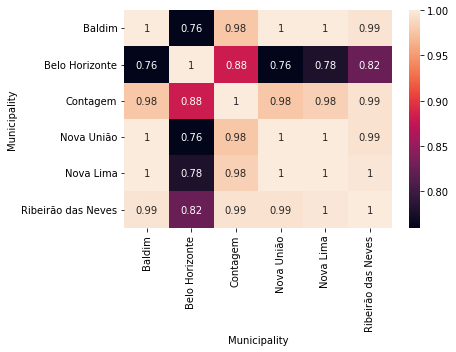

In [393]:
heatmap = sns.heatmap(s_c_df3.T.corr(),annot =True)

In [ ]:
s_c_df3.T

In [369]:
s_c_df3.index

Int64Index([2298, 2309, 2448, 2661, 2763, 2880], dtype='int64')

In [370]:
mncp

2298                Baldim
2309        Belo Horizonte
2448              Contagem
2661            Nova União
2763             Nova Lima
2880    Ribeirão das Neves
Name: Municipality, dtype: object

In [371]:
s_c_df3.index = mncp

In [372]:
s_c_df3["Type_of_Publicoffice"] = s_c_df3["Type_of_Publicoffice"].astype(int)

/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_34201/3337369315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_c_df3["Type_of_Publicoffice"] = s_c_df3["Type_of_Publicoffice"].astype(int)


In [373]:
s_c_df3["News_Paper"] = s_c_df3["News_Paper"].astype(int)

/var/folders/9g/vv71v1_j0v526k86ksyt9rv00000gn/T/ipykernel_34201/554910363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_c_df3["News_Paper"] = s_c_df3["News_Paper"].astype(int)


In [374]:
s_c_df3 = s_c_df3.astype(int)

In [375]:
n3t = s_c_df3.T

In [376]:
n3t

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
CodMun,3105004,3106200,3118601,3136603,3144805,3154606
State code,31,31,31,31,31,31
Pop,7780,2530701,673849,5739,97378,341415
track_pop,2,7,7,2,5,6
Region,3,3,3,3,3,3
Type_of_Publicoffice,1,2,1,1,1,1
News_Paper,0,1,1,0,1,0
Magazine,0,1,0,0,0,0
AM_Radio,0,1,0,0,0,1
FM_Radio,0,1,0,1,1,1


In [377]:
nett = n3t[5:]

In [378]:
n3t.dtypes

Municipality
Baldim                int64
Belo Horizonte        int64
Contagem              int64
Nova União            int64
Nova Lima             int64
Ribeirão das Neves    int64
dtype: object

In [379]:
cm3 = n3t.corr()

<Axes: xlabel='Municipality', ylabel='Municipality'>

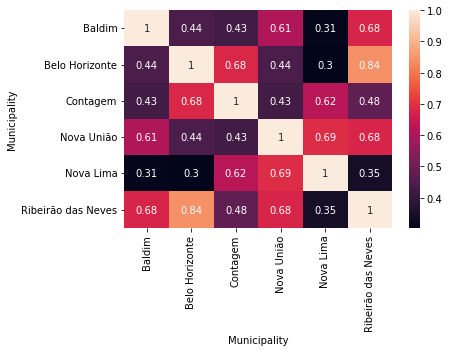

In [380]:
sns.heatmap(nett.corr(),annot = True)

In [451]:
cm3.to_csv('cm3.csv',index=False)

In [425]:
from sklearn.cluster import KMeans
import numpy as np

# Generate some example data
#X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# Create a K-means clustering model with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(cm3)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Print the cluster labels and centers
print("Cluster Labels:", labels)
print("Cluster Centers:", centers)


Cluster Labels: [0 1 0 0 0 0]
Cluster Centers: [[0.99428623 0.80042356 0.98640965 0.9942395  0.99584473 0.99600449]
 [0.75996132 1.         0.88011557 0.75952266 0.77814245 0.82437583]]


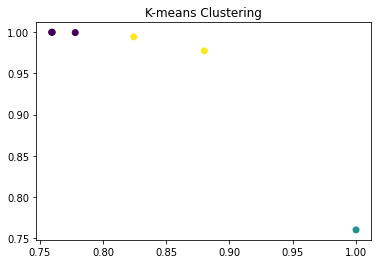

In [450]:
cm3['Cluster'] = labels

# Plot the clusters
plt.scatter(cm3['Belo Horizonte'], cm3['Baldim'], c=cm3['Cluster'], cmap='viridis')
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

In [428]:
cm3

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
Municipality,,,,,,
Baldim,1.000000,0.759961,0.977432,1.000000,0.999595,0.994404
Belo Horizonte,0.759961,1.000000,0.880116,0.759523,0.778142,0.824376
Contagem,0.977432,0.880116,1.000000,0.977290,0.983046,0.994280
Nova União,1.000000,0.759523,0.977290,1.000000,0.999576,0.994332
Nova Lima,0.999595,0.778142,0.983046,0.999576,1.000000,0.997006
Ribeirão das Neves,0.994404,0.824376,0.994280,0.994332,0.997006,1.000000


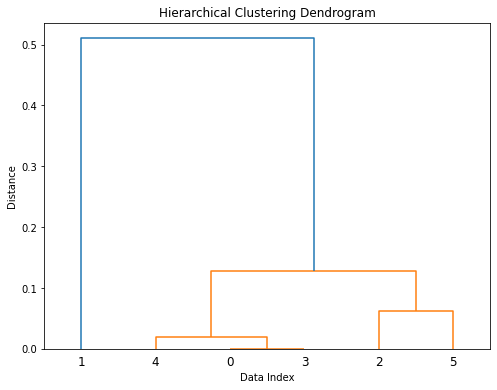

In [433]:
from scipy.cluster import hierarchy

dendrogram = hierarchy.linkage(cm3, method='complete')
plt.figure(figsize=(8, 6))
hierarchy.dendrogram(dendrogram)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
plt.scatter(data['feature1'], data['feature2'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

In [448]:
cm3

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
Municipality,,,,,,
Baldim,1.000000,0.759961,0.977432,1.000000,0.999595,0.994404
Belo Horizonte,0.759961,1.000000,0.880116,0.759523,0.778142,0.824376
Contagem,0.977432,0.880116,1.000000,0.977290,0.983046,0.994280
Nova União,1.000000,0.759523,0.977290,1.000000,0.999576,0.994332
Nova Lima,0.999595,0.778142,0.983046,0.999576,1.000000,0.997006
Ribeirão das Neves,0.994404,0.824376,0.994280,0.994332,0.997006,1.000000


In [462]:
n3t

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
CodMun,3105004,3106200,3118601,3136603,3144805,3154606
State code,31,31,31,31,31,31
Pop,7780,2530701,673849,5739,97378,341415
track_pop,2,7,7,2,5,6
Region,3,3,3,3,3,3
Type_of_Publicoffice,1,2,1,1,1,1
News_Paper,0,1,1,0,1,0
Magazine,0,1,0,0,0,0
AM_Radio,0,1,0,0,0,1
FM_Radio,0,1,0,1,1,1


In [439]:
labels

array([0, 1, 2, 0, 0, 2], dtype=int32)

In [440]:
sorted_corr_matrix = cm3[np.argsort(labels)]

KeyError: "None of [Int64Index([0, 3, 4, 1, 2, 5], dtype='int64', name='Municipality')] are in the [columns]"

In [441]:
np.argsort(labels)

array([0, 3, 4, 1, 2, 5])

In [446]:
type(cm3)

pandas.core.frame.DataFrame

<Axes: xlabel='Municipality', ylabel='Municipality'>

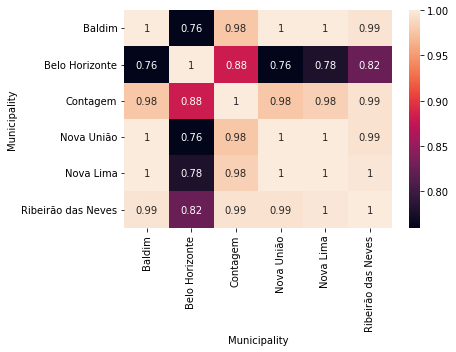

In [381]:
sns.heatmap(cm3,annot = True)

In [382]:
ndf = df.dropna()

In [383]:
ndf.columns

Index(['CodMun', 'State', 'State_code', 'Municipality', 'Estimated pop 2021',
       'track_pop', 'Region', 'Gender', 'Mayor_Age', 'Mayor_Ethnicity',
       'Ed_of_Mayor', 'Projects_aimed_at_RuralEducation'],
      dtype='object')

In [384]:
ndf = ndf[['CodMun','State_code', 'Estimated pop 2021',
       'track_pop', 'Region', 'Gender', 'Mayor_Age', 'Mayor_Ethnicity',
       'Ed_of_Mayor', 'Projects_aimed_at_RuralEducation']]

In [385]:
ndf["Projects_aimed_at_RuralEducation"] = ndf["Projects_aimed_at_RuralEducation"].replace({"-" : 99})

In [386]:
ndf.astype(int)

,CodMun,State_code,Estimated pop 2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
0,1100015,11,22516,4,1,1,40,1,9,1
1,1100023,11,111148,6,1,0,33,1,6,1
2,1100031,11,5067,2,1,1,50,2,6,1
3,1100049,11,86416,5,1,1,35,2,6,1
4,1100056,11,16088,3,1,0,57,1,6,99
...,...,...,...,...,...,...,...,...,...,...
5565,5222005,52,14088,3,5,1,38,1,6,1
5566,5222054,52,9002,2,5,1,55,1,4,99
5567,5222203,52,6451,2,5,1,49,1,6,99
5568,5222302,52,5941,2,5,1,49,2,6,99


In [387]:
df_rt = df.dropna()

In [388]:
tot_munc = df_rt["Municipality"]

In [389]:
len(tot_munc)

5557

In [390]:
ndf.index = tot_munc

In [391]:
nddf = ndf[~(ndf["Projects_aimed_at_RuralEducation"] == 99)]

In [395]:
len(nddf)

3220

In [396]:
nddf.head()

,CodMun,State_code,Estimated pop 2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
Municipality,,,,,,,,,,
Alta Floresta DOeste,1100015,11,22516,4,1,1.0,40.0,1.0,9.0,1
Ariquemes,1100023,11,111148,6,1,0.0,33.0,1.0,6.0,1
Cabixi,1100031,11,5067,2,1,1.0,50.0,2.0,6.0,1
Cacoal,1100049,11,86416,5,1,1.0,35.0,2.0,6.0,1
Colorado do Oeste,1100064,11,15213,3,1,1.0,56.0,2.0,6.0,1


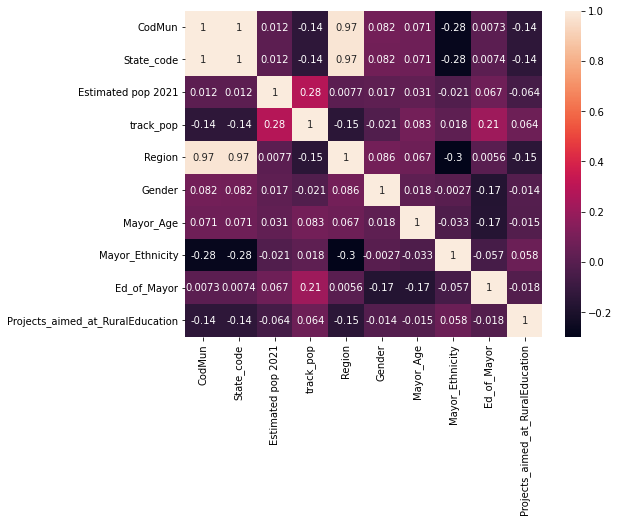

In [392]:
plt.figure(figsize=(8, 6))
sns.heatmap(nddf.corr(),annot=True)
plt.show()

In [399]:
 ndf1 = nddf[nddf['CodMun'].isin(muncipality_codes)]

# WE ARE SELECTING ONLY MUNCIPALTIES FROM THE SURVAY DATA 
# we removed the rows which doesnt have project aimed at rural education data ('-' values )

In [400]:
ndf1

,CodMun,State_code,Estimated pop 2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
Municipality,,,,,,,,,,
Baldim,3105004,31,7780,2,3,1.0,39.0,2.0,6.0,1
Belo Horizonte,3106200,31,2530701,7,3,1.0,62.0,1.0,5.0,0
Ribeirão das Neves,3154606,31,341415,6,3,1.0,45.0,1.0,6.0,0


In [417]:
new_m = ndf1.T[5:]

In [418]:
new_m.corr()# correlation of matrix of the above 

Municipality,Baldim,Belo Horizonte,Ribeirão das Neves
Municipality,,,
Baldim,1.000000,0.998328,0.999725
Belo Horizonte,0.998328,1.000000,0.998733
Ribeirão das Neves,0.999725,0.998733,1.000000


<Axes: xlabel='Municipality', ylabel='Municipality'>

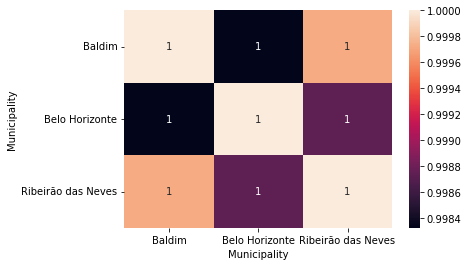

In [419]:
sns.heatmap(new_m.corr(),annot = True ) # heatmap of the correaltion matrix

In [597]:
que1 = new_m.corr()

In [598]:
que1.to_csv('que.csv',index = False)

In [595]:
ndf1

,CodMun,State_code,Estimated pop 2021,track_pop,Region,Gender,Mayor_Age,Mayor_Ethnicity,Ed_of_Mayor,Projects_aimed_at_RuralEducation
Municipality,,,,,,,,,,
Baldim,3105004,31,7780,2,3,1.0,39.0,2.0,6.0,1
Belo Horizonte,3106200,31,2530701,7,3,1.0,62.0,1.0,5.0,0
Ribeirão das Neves,3154606,31,341415,6,3,1.0,45.0,1.0,6.0,0


In [420]:
new_m_1 = ndf1.T[2:]

In [484]:
new_m_c = new_m_1.corr()

In [485]:
new_m_c.to_csv("nmc.csv",index =False)

<Axes: xlabel='Municipality', ylabel='Municipality'>

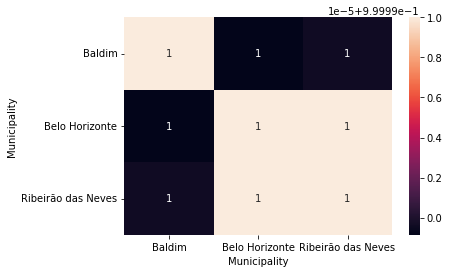

In [421]:
sns.heatmap(new_m_1.corr(),annot = True ) # heatmap of the correaltion matrix

In [576]:
new_m_1.corr()

Municipality,Baldim,Belo Horizonte,Ribeirão das Neves
Municipality,,,
Baldim,1.000000,0.999989,0.99999
Belo Horizonte,0.999989,1.000000,1.00000
Ribeirão das Neves,0.999990,1.000000,1.00000


In [423]:
ndf1_corr = ndf1.T.corr() # including the common information with codemun

In [424]:
#sns.heatmap(ndf1_corr, annot = True)

In [515]:
df4

,CodMun,State,State code,Mun,Pop,track_pop,Region,traning_periodically,training_occasionally,does_not_perform,...,Health_Black,Health_Agent_Program,Number_commnuity_health_agents,Programmes_Blacks,ES_muncipal_public_service,ES_another_Public_service,ES_affiliated_private_service-SUS,T/R_publicservice_another_muncipality,T/R_agreed_private-SUS,NoES
0,1100015,RO,11,Alta Floresta DOeste,22516,4,1,1,0,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
1,1100023,RO,11,Ariquemes,111148,6,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
2,1100031,RO,11,Cabixi,5067,2,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
3,1100049,RO,11,Cacoal,86416,5,1,0,1,0,...,0,1.0,-,0,1.0,1.0,0.0,0.0,0.0,-
4,1100056,RO,11,Cerejeiras,16088,3,1,0,1,0,...,0,1.0,-,-,1.0,0.0,0.0,0.0,0.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,5222005,GO,52,Vianópolis,14088,3,5,0,0,1,...,0,1.0,-,-,0.0,0.0,1.0,0.0,0.0,-
5566,5222054,GO,52,Vicentinópolis,9002,2,5,0,1,0,...,1,0.0,-,-,1.0,0.0,0.0,0.0,0.0,-
5567,5222203,GO,52,Vila Boa,6451,2,5,0,1,0,...,1,1.0,-,1,1.0,0.0,0.0,1.0,0.0,-
5568,5222302,GO,52,Vila Propício,5941,2,5,0,1,0,...,0,1.0,-,-,0.0,0.0,0.0,1.0,0.0,-


In [516]:
s_c_df4 = df4[df4['CodMun'].isin(muncipality_codes)]


In [525]:
len(s_c_df4.iloc[::,7::].columns)

29

In [527]:
new_df4 = s_c_df4.iloc[::,7::]

In [529]:
new_df4.T

,2298,2309,2448,2661,2763,2880
traning_periodically,0,0,0,0,0,0
training_occasionally,1,1,1,1,1,1
does_not_perform,0,0,0,0,0,0
provides_infrastructure,1,1,1,1,1,1
PI_own_room,1,1,1,0,1,1
PI_Computer,1,1,1,0,1,1
PI_printer,1,1,1,0,1,1
PI_Internet_Access,1,1,1,0,1,1
PI_Own_Vehicle,0,0,0,0,0,1
PI_Telephone,0,1,1,0,1,1


In [530]:
new_df4.columns

Index(['traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference', 'Year_conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
       'Year_last_Plan', 'Health_Black', 'Health_Agent_Program',
       'Number_commnuity_health_agents', 'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES'],
      dtype='object')

In [550]:
new_col = ['traning_periodically', 'training_occasionally', 'does_not_perform',
       'provides_infrastructure', 'PI_own_room', 'PI_Computer', 'PI_printer',
       'PI_Internet_Access', 'PI_Own_Vehicle', 'PI_Telephone', 'PI_Daily',
       'Own_budget_allocation', 'PI_Transportation',
       'Muncipal_Health_Conference',
       'Regional_Management_collegiate', 'meetings', 'Muncipal_Health_Plan',
    'Health_Black', 'Health_Agent_Program',
        'Programmes_Blacks',
       'ES_muncipal_public_service', 'ES_another_Public_service',
       'ES_affiliated_private_service-SUS',
       'T/R_publicservice_another_muncipality', 'T/R_agreed_private-SUS',
       'NoES']

In [551]:
new_df4_1 = new_df4[new_col]

In [552]:
new_df4_1.T

,2298,2309,2448,2661,2763,2880
traning_periodically,0,0,0,0,0,0
training_occasionally,1,1,1,1,1,1
does_not_perform,0,0,0,0,0,0
provides_infrastructure,1,1,1,1,1,1
PI_own_room,1,1,1,0,1,1
PI_Computer,1,1,1,0,1,1
PI_printer,1,1,1,0,1,1
PI_Internet_Access,1,1,1,0,1,1
PI_Own_Vehicle,0,0,0,0,0,1
PI_Telephone,0,1,1,0,1,1


In [553]:
new_df_2 = new_df4_1.replace({'-' : -999})

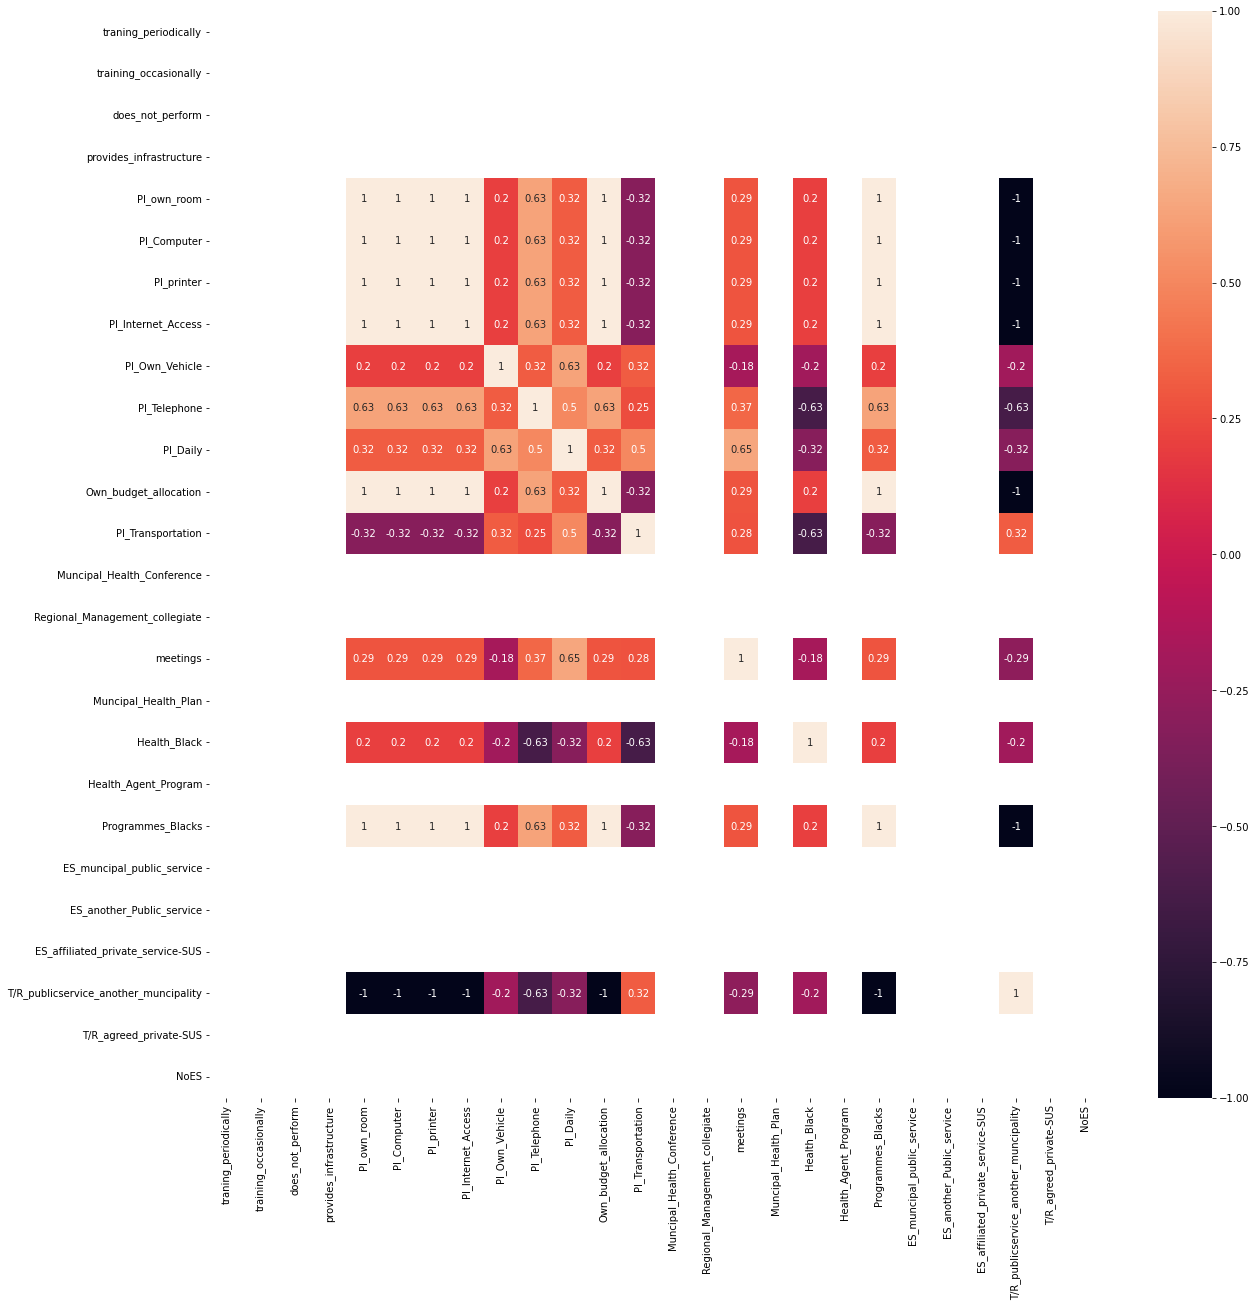

In [554]:
plt.figure(figsize=(20, 20))
sns.heatmap(new_df_2.corr(),annot=True)
plt.show()

In [558]:
new_df_2.index = mncp

In [562]:
health_data = new_df_2.T.corr()

In [563]:
health_data.to_csv('health_data',index = False)

<Axes: xlabel='Municipality', ylabel='Municipality'>

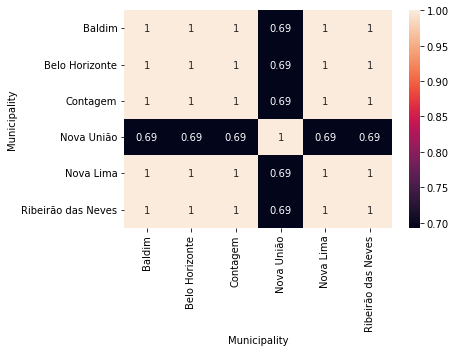

In [560]:
sns.heatmap(new_df_2.T.corr(),annot=True)

In [561]:
new_df_2.T

Municipality,Baldim,Belo Horizonte,Contagem,Nova União,Nova Lima,Ribeirão das Neves
traning_periodically,0.0,0.0,0.0,0.0,0.0,0.0
training_occasionally,1.0,1.0,1.0,1.0,1.0,1.0
does_not_perform,0.0,0.0,0.0,0.0,0.0,0.0
provides_infrastructure,1.0,1.0,1.0,1.0,1.0,1.0
PI_own_room,1.0,1.0,1.0,0.0,1.0,1.0
PI_Computer,1.0,1.0,1.0,0.0,1.0,1.0
PI_printer,1.0,1.0,1.0,0.0,1.0,1.0
PI_Internet_Access,1.0,1.0,1.0,0.0,1.0,1.0
PI_Own_Vehicle,0.0,0.0,0.0,0.0,0.0,1.0
PI_Telephone,0.0,1.0,1.0,0.0,1.0,1.0
